# PREDICTING BIKE SHARING DEMAND: MACHINE LEARNING 



## Table of Contents

* [1.Importing_the_relevant_libraries](#1.Importing_the_relevant_libraries)

* [2.Importing_my_dataset](#2.Importing_my_dataset)

* [3.Data_preprocessing_and_cleaning](#3.Data_preprocessing_and_cleaning)

* [4.Exploratory_data_visualization](#4.Exploratory_data_visualization)

* [5.Scaling_the_Data](#5.Scaling_the_Data)

* [6.MACHINE_LEARNING_MODEL](#6.MACHINE_LEARNING_MODEL)

* [7.Hyperparameter_Tuning](#7.Hyperparameter_Tuning)

* [8.Making_Predictions](#8.Making_Predictions)

## INTRODUCTION

#### Dataset URL:
My dataset was gotten from kaggle https://www.kaggle.com/code/rajmehra03/bike-sharing-demand-rmsle-0-3194. 

#### Description of the dataset:
This is a bike-sharing service that allows people to borrow and return bikes from one station from one bike station to another which belongs to the same network.
The data set will be used to investigate the key characteristics that influence the demand for shared bikes in South Korean and evaluating how well these variables account for differences in bike demand.

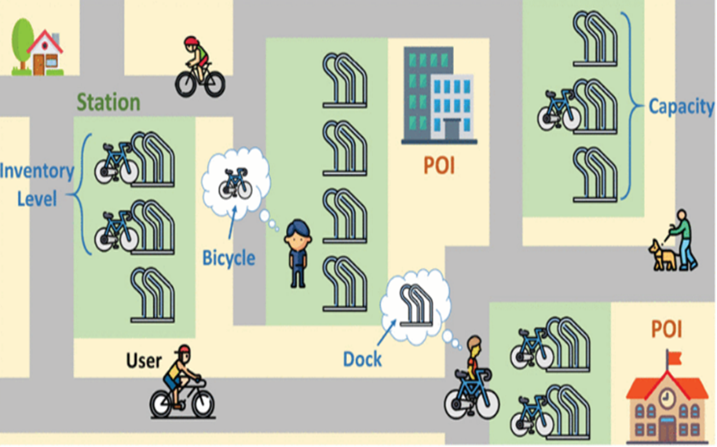
 
The dataset contains 17,379 rows and 17 colums, below are the columns

1. dteday (Date:datetime)
2. season (categorical data)
3. year (
4. mnth
5. hr
6. holiday
7. weekday
8. workingday
9. weathersit
10. temp
11. atemp
12. hum
13. windspeed (
14. casual (Number of casual bikers)
15. registered (Number of registered bikers)
16. cnt (Rented bike count)

#### Algorithms to be used
Linear Regression,
Random Forest,
Decision Trees,
SVM Regression,
KNN Regression,
Lasso Regression,
Ridge Regression,
Neural Network,



## 1.Importing_the_relevant_libraries

In [1]:
# Ignore the warnings

import warnings
warnings.filterwarnings('ignore')

# Data visualization and manipulations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regression algorithm
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

## 2.Importing_my_dataset

In [2]:
bike= pd.read_csv(r"C:\Users\q2241217\Downloads\bike_rental_hour.csv")

## 3.Data_preprocessing_and_cleaning

In [3]:
# Checking the first five(5) rows of the dataset
bike.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [4]:
# Checking the last five(5) rows of the dataset
bike.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [5]:
# displaying the number of columns(features) and rows(observations)
bike.shape

(17379, 17)

In [6]:
# Checking the structure and information of the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
#Checking the descriptive statistics analysis of the dataset
bike.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [8]:
# checks for unique values in the dataset
bike.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Data quality checks

In [9]:
# checking for duplicates and it can be seen that there were no duplicates
bike.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

In [10]:
#Checking the number of duplicate records in the dataset
bike.duplicated().sum()

0

In [11]:
#This is used to check for missing values in the dataset
bike.isnull()

instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False  False  False  False    False    False   
1        False   False   False  False  False  False    False    False   
2        False   False   False  False  False  False    False    False   
3        False   False   False  False  False  False    False    False   
4        False   False   False  False  False  False    False    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
17374    False   False   False  False  False  False    False    False   
17375    False   False   False  False  False  False    False    False   
17376    False   False   False  False  False  False    False    False   
17377    False   False   False  False  False  False    False    False   
17378    False   False   False  False  False  False    False    False   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
0           False       False  False  False  False      False   False   
1           False       False  False  False  False      False   False   
2           False       False  False  False  False      False   False   
3           False       False  False  False  False      False   False   
4           False       False  False  False  False      False   False   
...           ...         ...    ...    ...    ...        ...     ...   
17374       False       False  False  False  False      False   False   
17375       False       False  False  False  False      False   False   
17376       False       False  False  False  False      False   False   
17377       False       False  False  False  False      False   False   
17378       False       False  False  False  False      False   False   

       registered    cnt  
0           False  False  
1           False  False  
2           False  False  
3           False  False  
4           False  False  
...           ...    ...  
17374       False  False  
17375       False  False  
17376       False  False  
17377       False  False  
17378       False  False  

[17379 rows x 17 columns]

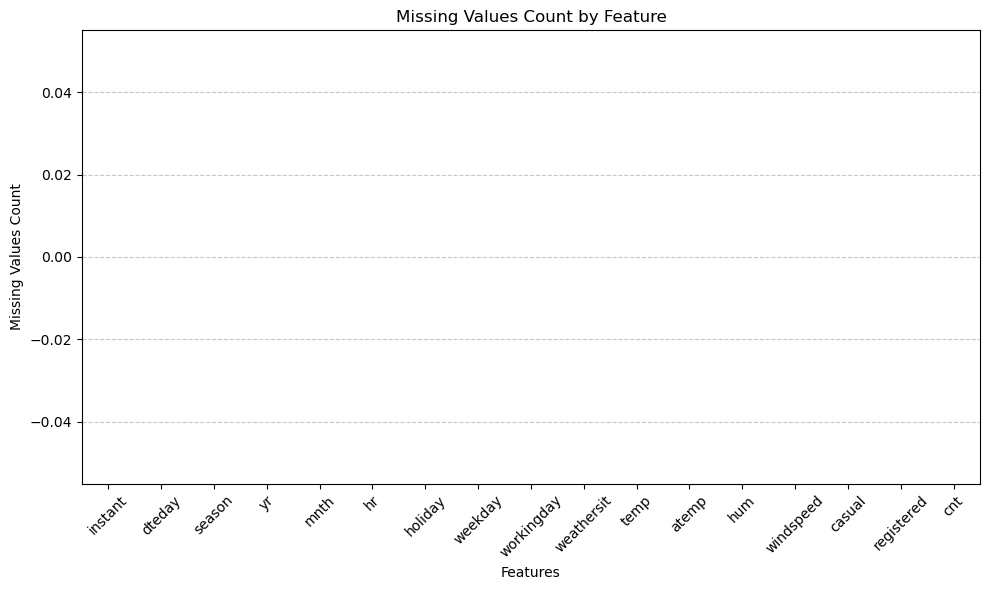

In [12]:
# Get the missing values count
missing_values_count = bike.isnull().sum()
 
# Plotting the bar chart
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count by Feature')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
#Checking the number of missing values in each column
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Converting the data type of the dteday to datetime

In [14]:
bike['dteday'] = pd.to_datetime(bike['dteday'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
#Extracting year and month from the dteday column as we are not sure that the yr and mnth column is correct
bike['month'] = bike['dteday'].dt.month
bike['year'] = bike['dteday'].dt.year
bike.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  month  \
0           1  0.24  0.2879  0.81        0.0       3          13   16      1   
1           1  0.22  0.2727  0.80        0.0       8          32   40      1   
2           1  0.22  0.2727  0.80        0.0       5          27   32      1   
3           1  0.24  0.2879  0.75        0.0       3          10   13      1   
4           1  0.24  0.2879  0.75        0.0       0           1    1      1   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

In [16]:
#Renaming some of the column to a readable word

bike.rename(columns={'hr': 'hour','hum': 'humidity','cnt': 'count', 'weathersit':'weather'}, inplace=True)
bike.head()

instant     dteday  season  yr  mnth  hour  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1     0        0        6           0   
1        2 2011-01-01       1   0     1     1        0        6           0   
2        3 2011-01-01       1   0     1     2        0        6           0   
3        4 2011-01-01       1   0     1     3        0        6           0   
4        5 2011-01-01       1   0     1     4        0        6           0   

   weather  temp   atemp  humidity  windspeed  casual  registered  count  \
0        1  0.24  0.2879      0.81        0.0       3          13     16   
1        1  0.22  0.2727      0.80        0.0       8          32     40   
2        1  0.22  0.2727      0.80        0.0       5          27     32   
3        1  0.24  0.2879      0.75        0.0       3          10     13   
4        1  0.24  0.2879      0.75        0.0       0           1      1   

   month  year  
0      1  2011  
1      1  2011  
2      1  2011  
3      1  2011  
4      1  2011

In [17]:
# Removing some unneccesary columns
bike.drop(columns=['instant','dteday','yr','mnth',], inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   hour        17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   weekday     17379 non-null  int64  
 4   workingday  17379 non-null  int64  
 5   weather     17379 non-null  int64  
 6   temp        17379 non-null  float64
 7   atemp       17379 non-null  float64
 8   humidity    17379 non-null  float64
 9   windspeed   17379 non-null  float64
 10  casual      17379 non-null  int64  
 11  registered  17379 non-null  int64  
 12  count       17379 non-null  int64  
 13  month       17379 non-null  int64  
 14  year        17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


### Checking for outliers

In [18]:
# iterating the columns
for col in bike.columns:
    print(col)

season
hour
holiday
weekday
workingday
weather
temp
atemp
humidity
windspeed
casual
registered
count
month
year


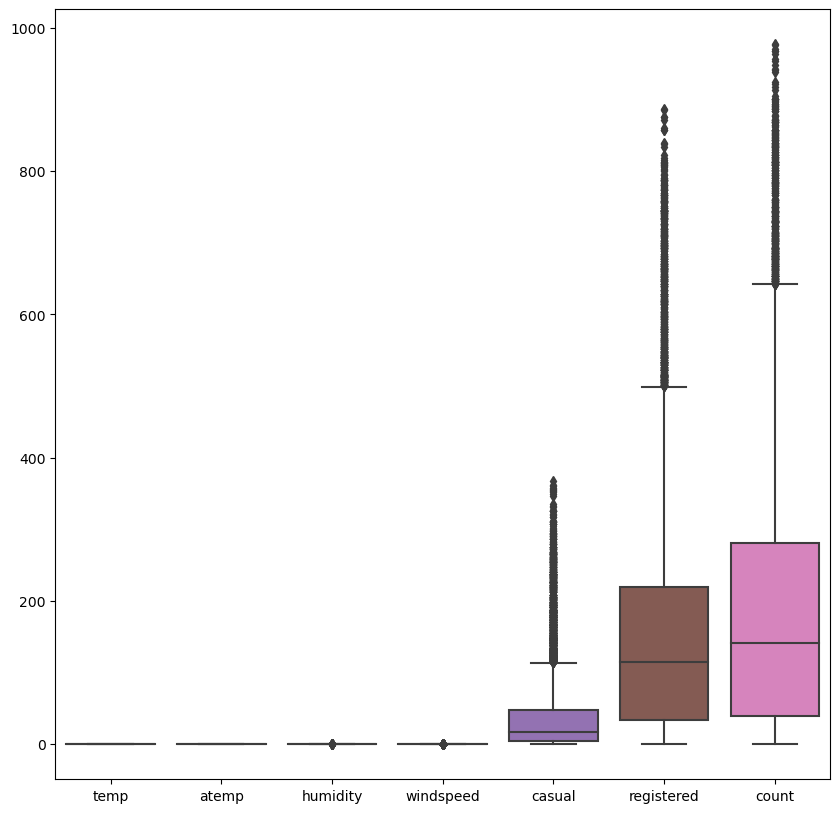

In [19]:

sns.boxplot(data=bike[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

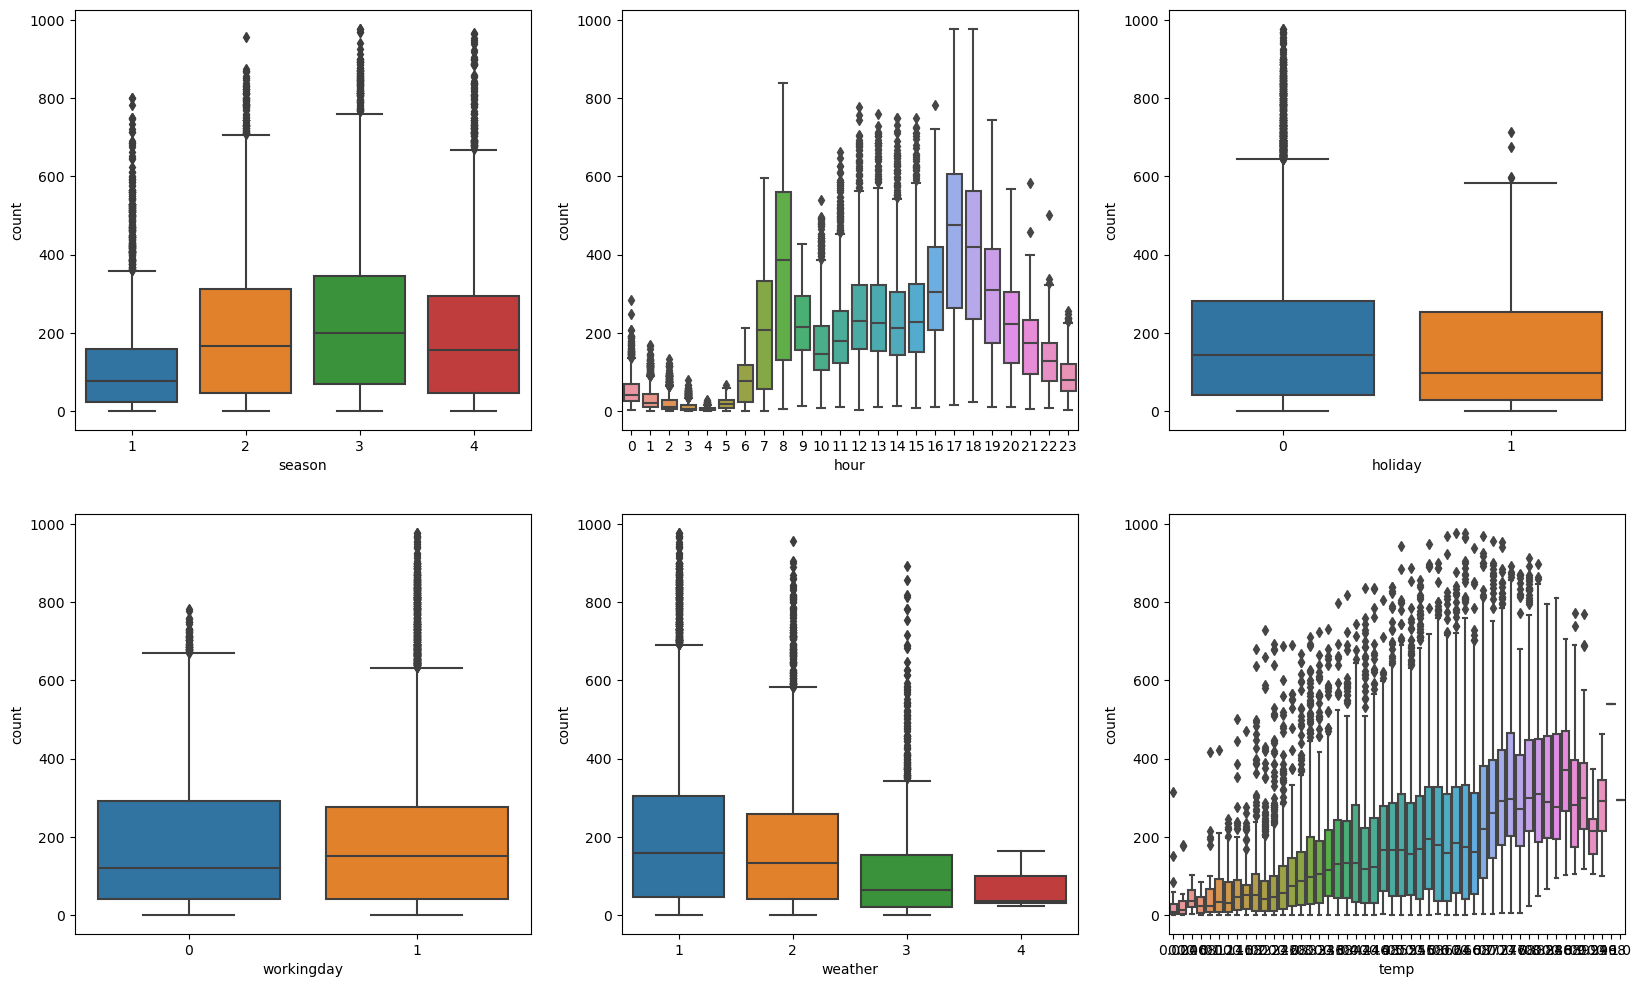

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'hour', y = 'count', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weather', y = 'count', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'temp', y = 'count', data = bike)
plt.show()

### Encoding and converting some of the variables to  categorical data

In [21]:
# converting seasons to categorical variable; 1:spring, 2:summer, 3:fall, 4:winter. Theses are the seasons of the year

bike.loc[(bike['season'] ==1), 'season'] = 'winter'
bike.loc[(bike['season'] ==2), 'season'] = 'spring'
bike.loc[(bike['season'] ==3), 'season'] = 'summer'
bike.loc[(bike['season'] ==4), 'season'] = 'autumn'


bike.head()

season  hour  holiday  weekday  workingday  weather  temp   atemp  \
0  winter     0        0        6           0        1  0.24  0.2879   
1  winter     1        0        6           0        1  0.22  0.2727   
2  winter     2        0        6           0        1  0.22  0.2727   
3  winter     3        0        6           0        1  0.24  0.2879   
4  winter     4        0        6           0        1  0.24  0.2879   

   humidity  windspeed  casual  registered  count  month  year  
0      0.81        0.0       3          13     16      1  2011  
1      0.80        0.0       8          32     40      1  2011  
2      0.80        0.0       5          27     32      1  2011  
3      0.75        0.0       3          10     13      1  2011  
4      0.75        0.0       0           1      1      1  2011

In [22]:
# converting weather to categorical variable; 1:sunny, 2:rainy, 3:windy, 4:cloudy. 
bike.loc[(bike['weather'] ==1), 'weather'] = 'sunny'
bike.loc[(bike['weather'] ==2), 'weather'] = 'rainy'
bike.loc[(bike['weather'] ==3), 'weather'] = 'windy'
bike.loc[(bike['weather'] ==4), 'weather'] = 'cloudy'


bike.head()

season  hour  holiday  weekday  workingday weather  temp   atemp  humidity  \
0  winter     0        0        6           0   sunny  0.24  0.2879      0.81   
1  winter     1        0        6           0   sunny  0.22  0.2727      0.80   
2  winter     2        0        6           0   sunny  0.22  0.2727      0.80   
3  winter     3        0        6           0   sunny  0.24  0.2879      0.75   
4  winter     4        0        6           0   sunny  0.24  0.2879      0.75   

   windspeed  casual  registered  count  month  year  
0        0.0       3          13     16      1  2011  
1        0.0       8          32     40      1  2011  
2        0.0       5          27     32      1  2011  
3        0.0       3          10     13      1  2011  
4        0.0       0           1      1      1  2011

In [23]:
# converting weekday to categorical variable; 0:sunday, 1:monday, 2:tuesday, 3:wednesday, 4:thursday, 5:friday, 6:saturday. Theses are the days in the week
bike.loc[(bike['weekday'] ==0), 'weekday'] = 'sunday'
bike.loc[(bike['weekday'] ==1), 'weekday'] = 'monday'
bike.loc[(bike['weekday'] ==2), 'weekday'] = 'tuesday'
bike.loc[(bike['weekday'] ==3), 'weekday'] = 'wednesday'
bike.loc[(bike['weekday'] ==4), 'weekday'] = 'thursday'
bike.loc[(bike['weekday'] ==5), 'weekday'] = 'friday'
bike.loc[(bike['weekday'] ==6), 'weekday'] = 'saturday'

bike.head()

season  hour  holiday   weekday  workingday weather  temp   atemp  \
0  winter     0        0  saturday           0   sunny  0.24  0.2879   
1  winter     1        0  saturday           0   sunny  0.22  0.2727   
2  winter     2        0  saturday           0   sunny  0.22  0.2727   
3  winter     3        0  saturday           0   sunny  0.24  0.2879   
4  winter     4        0  saturday           0   sunny  0.24  0.2879   

   humidity  windspeed  casual  registered  count  month  year  
0      0.81        0.0       3          13     16      1  2011  
1      0.80        0.0       8          32     40      1  2011  
2      0.80        0.0       5          27     32      1  2011  
3      0.75        0.0       3          10     13      1  2011  
4      0.75        0.0       0           1      1      1  2011

In [24]:
# converting month to categorical variable from Jan to Dec. 
bike.loc[(bike['month'] ==1), 'month'] = 'jan'
bike.loc[(bike['month'] ==2), 'month'] = 'feb'
bike.loc[(bike['month'] ==3), 'month'] = 'mar'
bike.loc[(bike['month'] ==4), 'month'] = 'apr'
bike.loc[(bike['month'] ==5), 'month'] = 'may'
bike.loc[(bike['month'] ==6), 'month'] = 'jun'
bike.loc[(bike['month'] ==7), 'month'] = 'jul'
bike.loc[(bike['month'] ==8), 'month'] = 'aug'
bike.loc[(bike['month'] ==9), 'month'] = 'sept'
bike.loc[(bike['month'] ==10), 'month'] = 'oct'
bike.loc[(bike['month'] ==11), 'month'] = 'nov'
bike.loc[(bike['month'] ==12), 'month'] = 'dec'
bike.head()

season  hour  holiday   weekday  workingday weather  temp   atemp  \
0  winter     0        0  saturday           0   sunny  0.24  0.2879   
1  winter     1        0  saturday           0   sunny  0.22  0.2727   
2  winter     2        0  saturday           0   sunny  0.22  0.2727   
3  winter     3        0  saturday           0   sunny  0.24  0.2879   
4  winter     4        0  saturday           0   sunny  0.24  0.2879   

   humidity  windspeed  casual  registered  count month  year  
0      0.81        0.0       3          13     16   jan  2011  
1      0.80        0.0       8          32     40   jan  2011  
2      0.80        0.0       5          27     32   jan  2011  
3      0.75        0.0       3          10     13   jan  2011  
4      0.75        0.0       0           1      1   jan  2011

In [25]:
# converting workingday to categorical variable, it's either a holiday or a work day
bike.loc[(bike['workingday'] ==0), 'workingday'] = 'holiday'
bike.loc[(bike['workingday'] ==1), 'workingday'] = 'work day'
bike.head()

season  hour  holiday   weekday workingday weather  temp   atemp  humidity  \
0  winter     0        0  saturday    holiday   sunny  0.24  0.2879      0.81   
1  winter     1        0  saturday    holiday   sunny  0.22  0.2727      0.80   
2  winter     2        0  saturday    holiday   sunny  0.22  0.2727      0.80   
3  winter     3        0  saturday    holiday   sunny  0.24  0.2879      0.75   
4  winter     4        0  saturday    holiday   sunny  0.24  0.2879      0.75   

   windspeed  casual  registered  count month  year  
0        0.0       3          13     16   jan  2011  
1        0.0       8          32     40   jan  2011  
2        0.0       5          27     32   jan  2011  
3        0.0       3          10     13   jan  2011  
4        0.0       0           1      1   jan  2011

In [26]:
# i will be dropping the holiday column now as it's not needed for the EDA
bike.drop(columns=['holiday'], inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   hour        17379 non-null  int64  
 2   weekday     17379 non-null  object 
 3   workingday  17379 non-null  object 
 4   weather     17379 non-null  object 
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
 12  month       17379 non-null  object 
 13  year        17379 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 1.9+ MB


In [27]:
# since i have 2 years in my dataset i will be converting them to 2011:0, 2012:1
bike.loc[(bike['year'] ==2011), 'year'] = 0
bike.loc[(bike['year'] ==2012), 'year'] = 1
bike.head()

season  hour   weekday workingday weather  temp   atemp  humidity  \
0  winter     0  saturday    holiday   sunny  0.24  0.2879      0.81   
1  winter     1  saturday    holiday   sunny  0.22  0.2727      0.80   
2  winter     2  saturday    holiday   sunny  0.22  0.2727      0.80   
3  winter     3  saturday    holiday   sunny  0.24  0.2879      0.75   
4  winter     4  saturday    holiday   sunny  0.24  0.2879      0.75   

   windspeed  casual  registered  count month  year  
0        0.0       3          13     16   jan     0  
1        0.0       8          32     40   jan     0  
2        0.0       5          27     32   jan     0  
3        0.0       3          10     13   jan     0  
4        0.0       0           1      1   jan     0

## 4.Exploratory_data_visualization

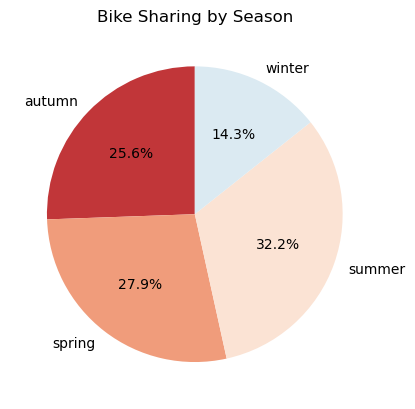

In [28]:
# which season has the highest count of bike

workingday_counts = bike.groupby('season')['count'].sum()

# Pie chart
plt.pie(workingday_counts, labels=workingday_counts.index, autopct='%1.1f%%', colors=sns.color_palette('RdBu'), startangle=90)

# Set chart title
plt.title('Bike Sharing by Season')

# Display the pie chart
plt.show()

The chart shows that there are more bike sharing during the summer period, followed by spring, autumn and winter respectively.

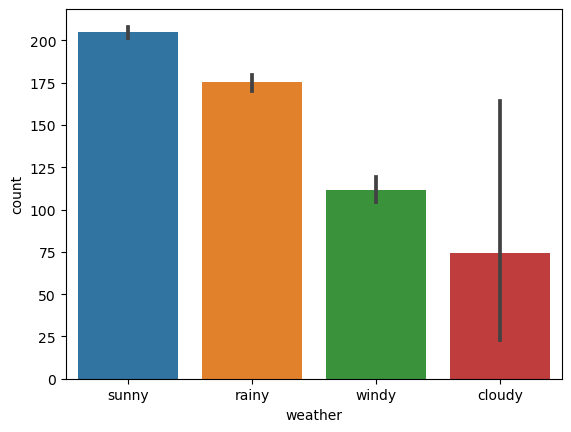

In [29]:
# what weaher conditions do we have the highest bike sharing
custom_palette = 'viridis'

sns.barplot(x='weather', y='count', data=bike)
plt.show()

The bar chart shows that people are more liely to use a bike when the weather is sunny and rainy in orde to get home faster .

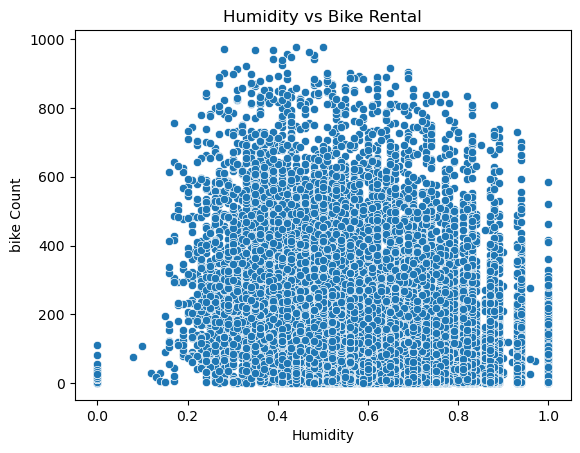

In [30]:
# how does the humidity affect bike sharing (hum vs cnt)
sns.scatterplot(x='humidity', y='count', data=bike, palette='viridis')

# Set plot labels and title
plt.xlabel('Humidity')
plt.ylabel('bike Count')
plt.title('Humidity vs Bike Rental')

# Display the plot
plt.show()

High humidity levels typically lead to a decrease in bike count due to discomfort and other factors, but the specific effect may vary depending on the context.

Text(0.5, 1.0, 'Windspeed vs Bike Share')

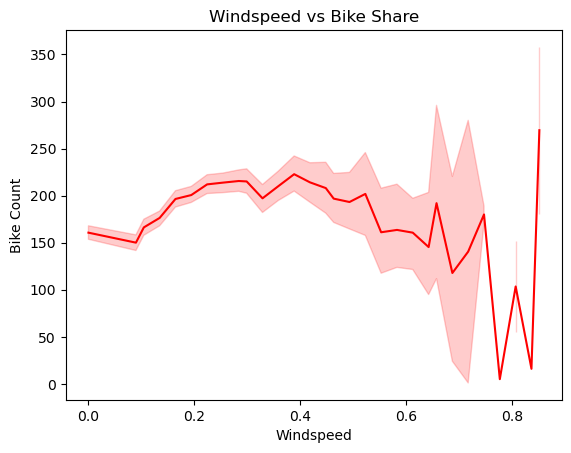

In [31]:
#how does the windspeed affect the bike share(wind vs cnt)
sns.lineplot(x='windspeed', y='count', data=bike, color='red')

# Set plot labels and title
plt.xlabel('Windspeed')
plt.ylabel('Bike Count')
plt.title('Windspeed vs Bike Share')

Wind speed affects bike sharing but its effect is dependent on factors like difficulty and perceived discomfort associated with cycling. the line plot shows that better the windspeed the higher the count of bike sharing.

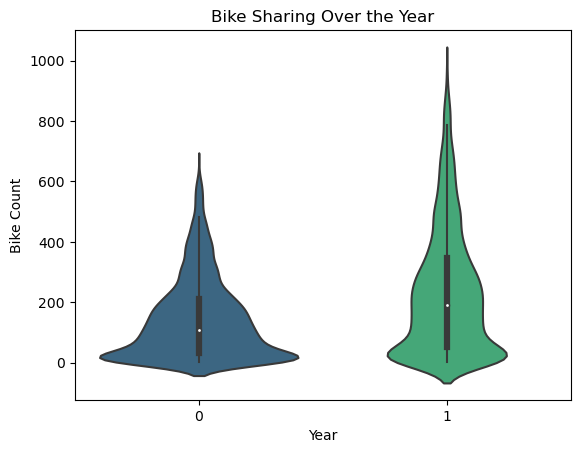

In [32]:
#over the period of the year wwhen was the bike sharing highest (year vs cnt)
sns.violinplot(x='year', y='count', data=bike, palette='viridis')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Bike Count')
plt.title('Bike Sharing Over the Year')
plt.show()

The violin plot shows that in year 1 (2012) the the amount of bike sharing increased as againt 2011 (year 0), which can depict that people are becoming to embrace the bike sharing as the year progress.

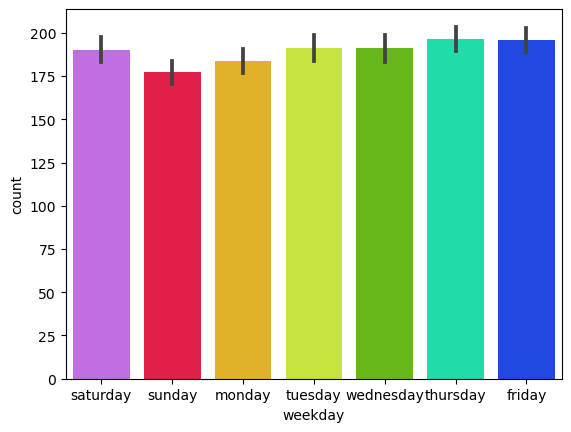

In [33]:
# which day of the week do people use bike sharing system the most

sns.barplot(x='weekday', y='count', data=bike, palette='gist_ncar_r')

plt.show()

The bar chart shows that people use the bike sharing system more over the weekend than during the weekday.

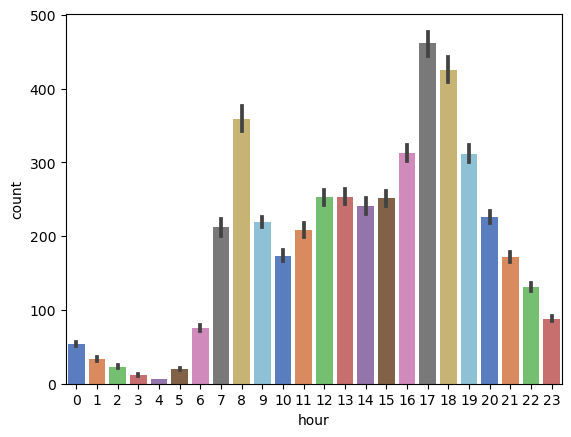

In [34]:
# what time of the day do they normally see high rate of bike share
sns.barplot(x='hour', y='count', data=bike, palette='muted')

plt.show()

The bar chart shows that people use the bike more early hours of themorning whn people are going to work and the evening time when people has close from work. which means that from 9am to 4pm the number of bike share is reduced.

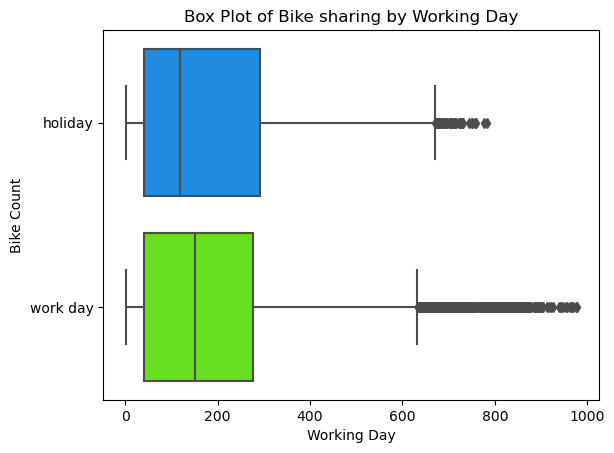

In [35]:
# Create a box plot
sns.boxplot(x='count', y='workingday', data=bike, palette='gist_rainbow_r')

# Set plot labels and title
plt.xlabel('Working Day')
plt.ylabel('Bike Count')
plt.title('Box Plot of Bike sharing by Working Day')

# Display the box plot
plt.show()

The box plot shows that people are more likely to use the bike sharing system during work day than during the holidays

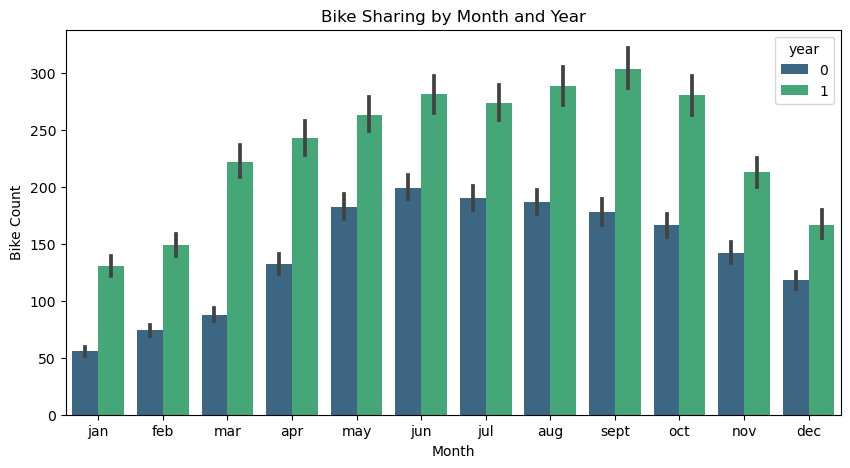

In [36]:
# what year and month did they see high number of bike sharing
plt.figure(figsize=(10, 5))

# Assuming 'month', 'count', and 'year' are the column names in your DataFrame
# bike is your DataFrame

sns.barplot(x='month', y='count', hue='year', data=bike, palette='viridis')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Bike Count')
plt.title('Bike Sharing by Month and Year')

# Display the bar plot
plt.show()

This shows that the rate of bike sharing was highest in 2012(Year 1) and that in September there was increased number of rentals.

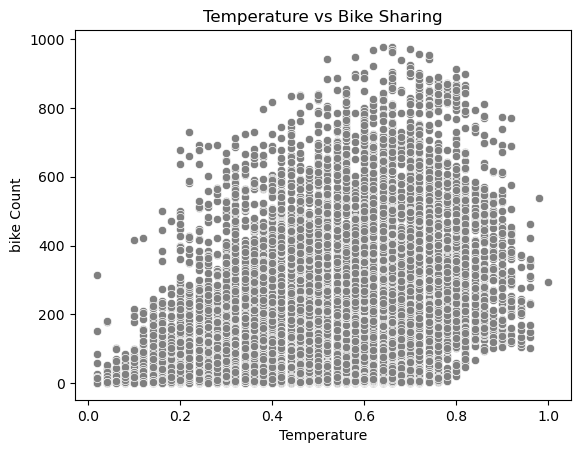

In [37]:
sns.scatterplot(x='temp', y='count', data=bike, color='grey')

# Set plot labels and title
plt.xlabel('Temperature')
plt.ylabel('bike Count')
plt.title('Temperature vs Bike Sharing')

# Display the plot
plt.show()

Temperature significantly influences bike-sharing patterns, with optimal conditions boosting bike counts and extreme temperatures decreasing usage, aiding urban planners and operators in promoting sustainable transportation.

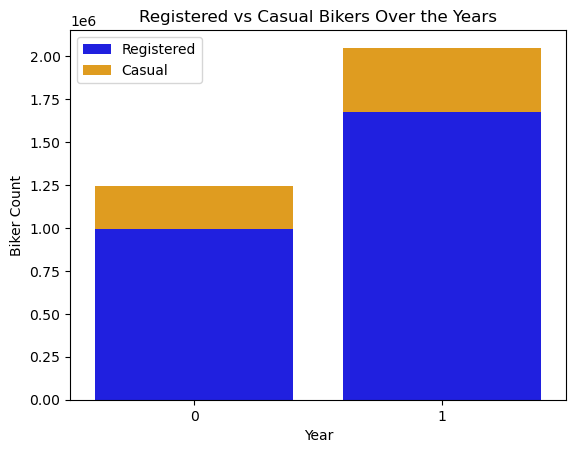

In [38]:
# comparing the number of registered and casual bikers over the 2 years

bike_counts = bike.groupby(['year'])[['registered', 'casual']].sum().reset_index()

# Stacked bar plot
sns.barplot(x='year', y='registered', data=bike_counts, label='Registered', color='blue')
sns.barplot(x='year', y='casual', data=bike_counts, label='Casual', color='orange', bottom=bike_counts['registered'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Biker Count')
plt.title('Registered vs Casual Bikers Over the Years')

# Add a legend
plt.legend()

# Display the stacked bar plot
plt.show()

Over the 2 years i can see that there are registered members than casual people that uses the bike sharing system.

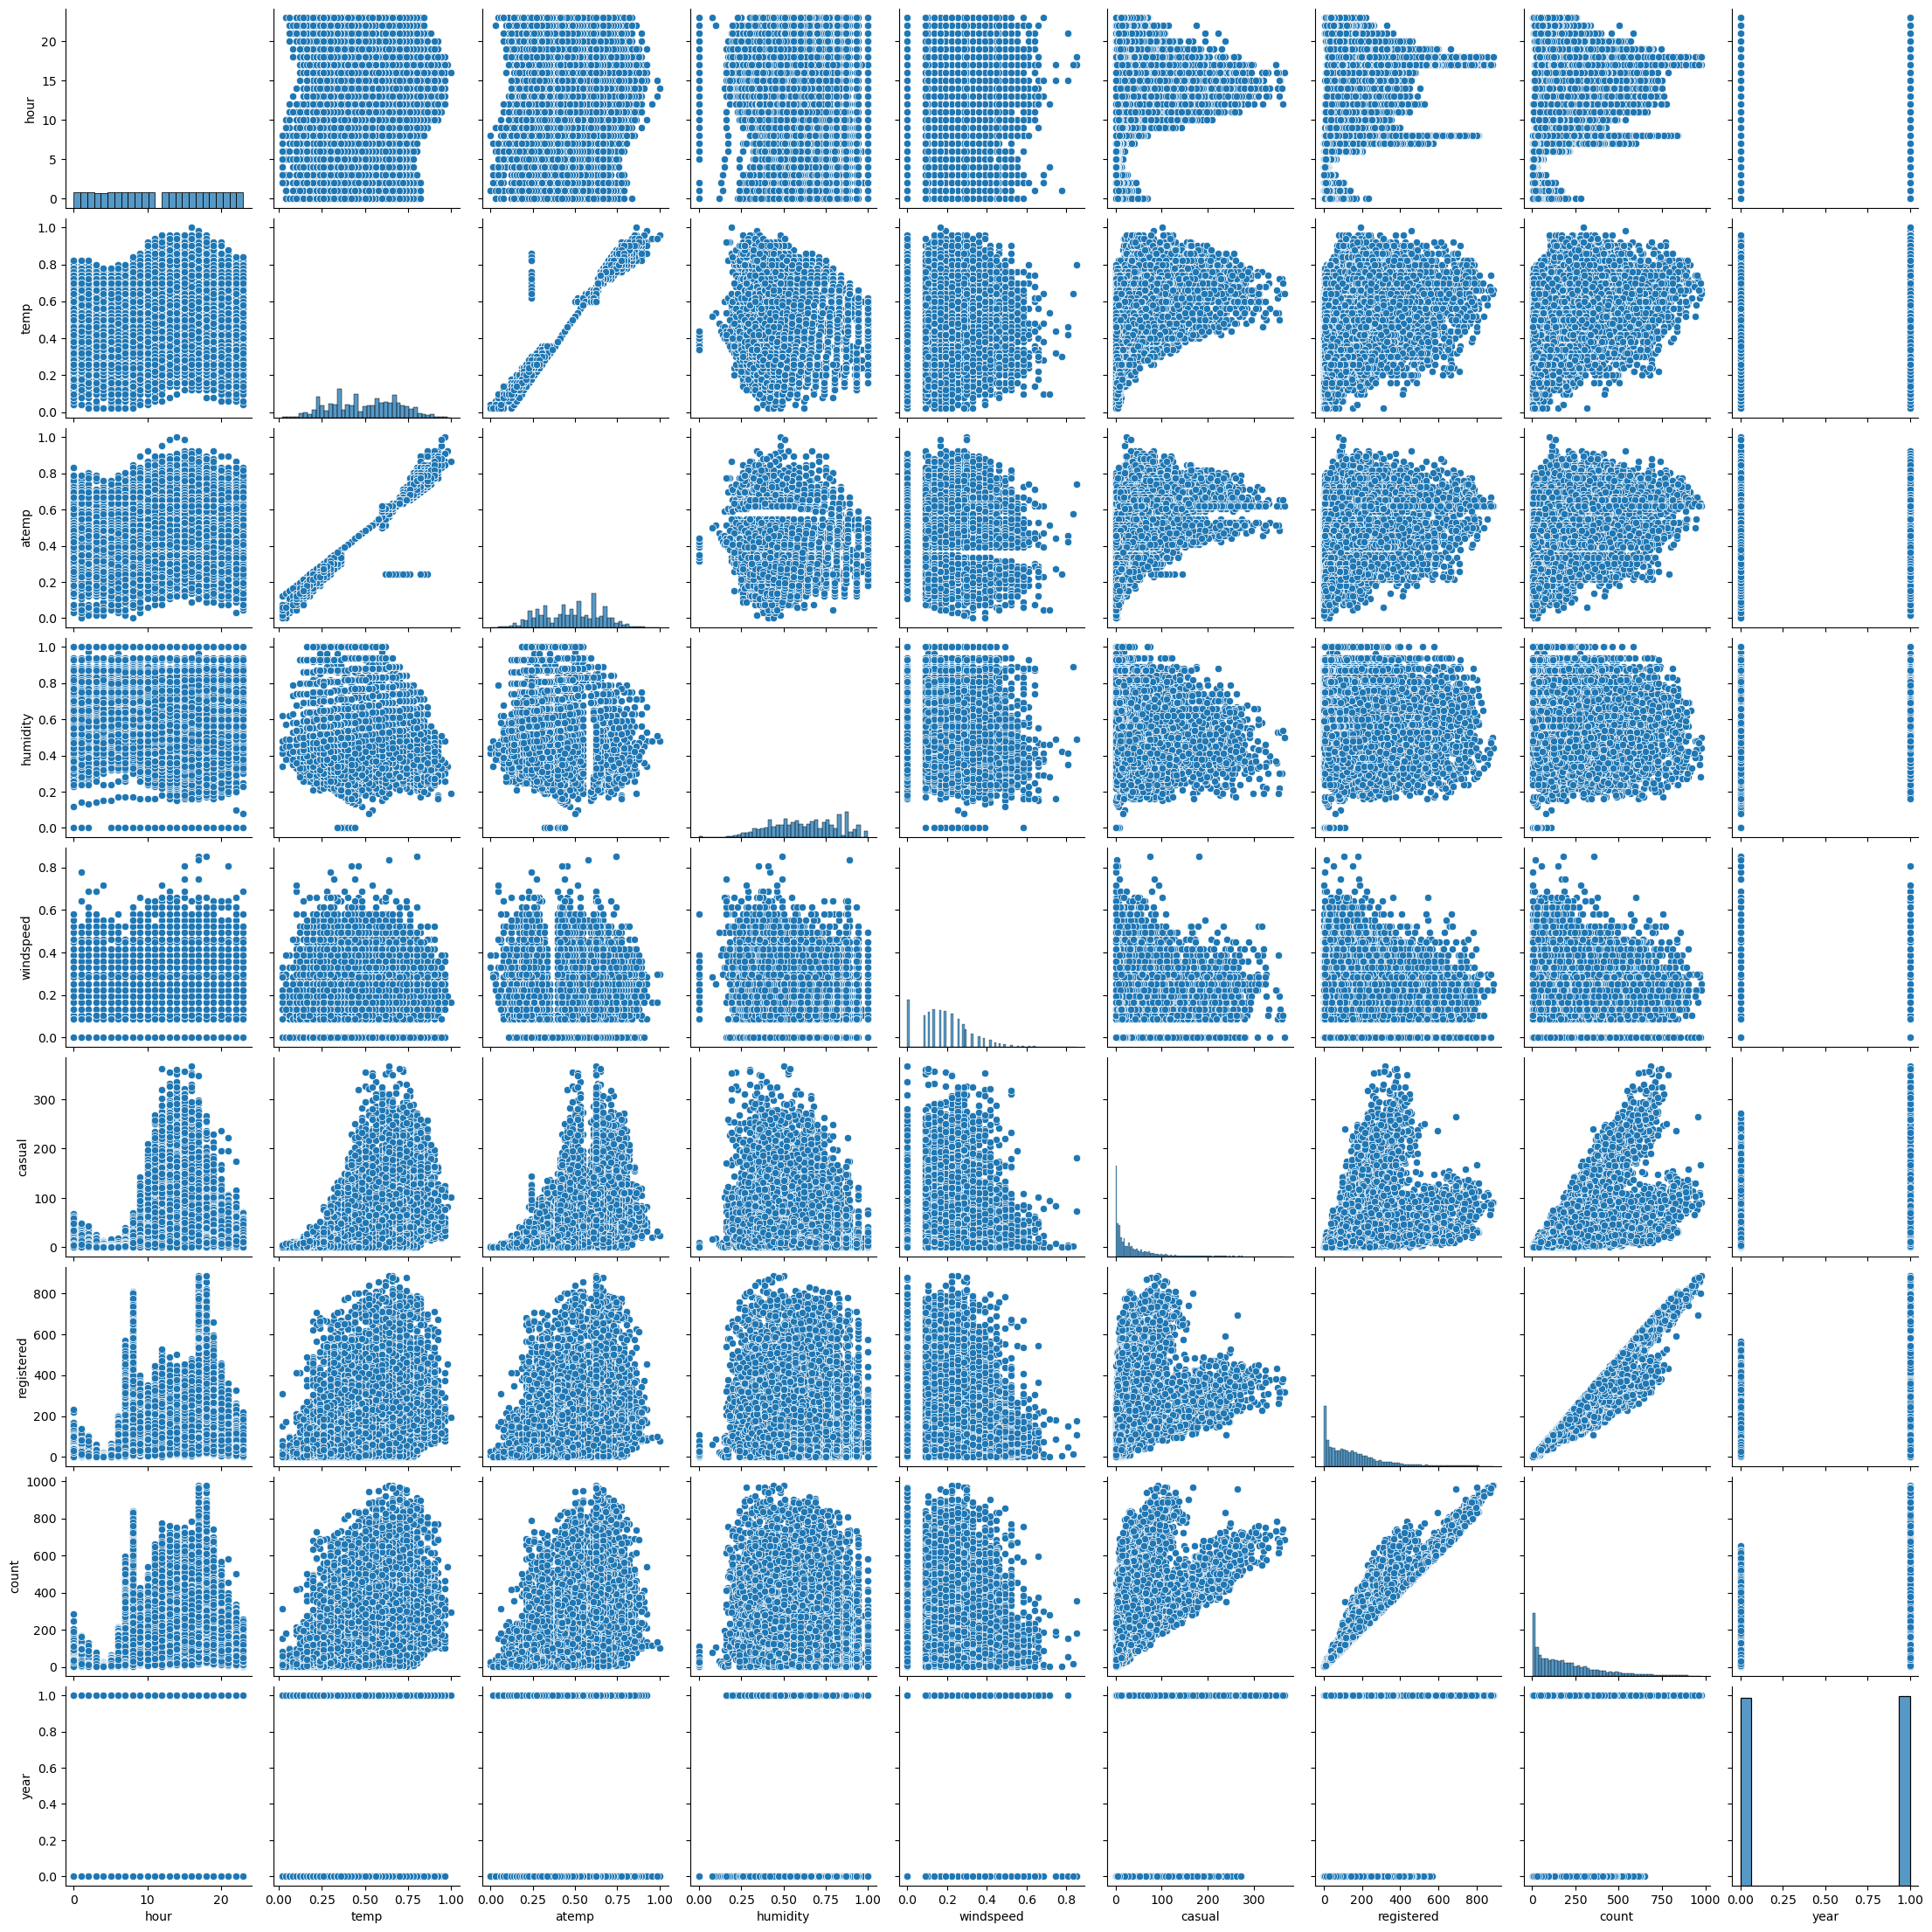

In [39]:
# Visualizing the relationship between the variables
sns.pairplot(bike)
plt.show()

 The pair plot aids in identifying patterns, trends, and potential correlations, of the data's multivariate relationships and aiding in data exploration and analysis.

<Axes: >

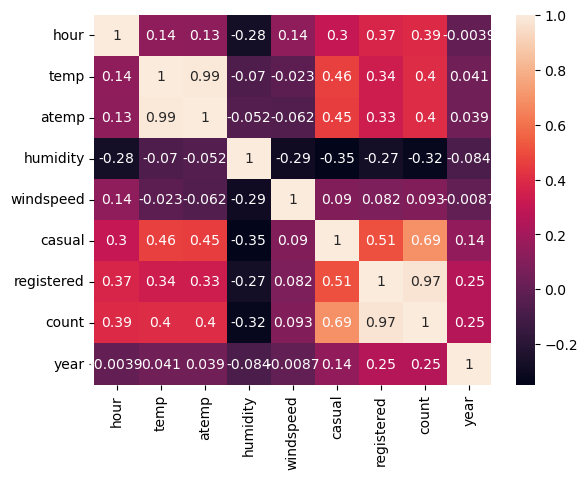

In [40]:
sns.heatmap(bike.corr(),annot=True)

The heat map shows the correlation between the variable, my plots shows that the registered variable is more correlated to the target variable which is count. which in the course of the code was removed inorder to to cause bias in the model.

#### From the heat map, it can be observed that temp and atemp is highly correlated and registered is also highly correlated to count therefore i will be dropping the atemp and registered variables to avoid Multicollinearity.

In [41]:
# Removing some unneccesary columns
bike.drop(columns=['atemp','registered'], inplace=True)
bike.head()

season  hour   weekday workingday weather  temp  humidity  windspeed  \
0  winter     0  saturday    holiday   sunny  0.24      0.81        0.0   
1  winter     1  saturday    holiday   sunny  0.22      0.80        0.0   
2  winter     2  saturday    holiday   sunny  0.22      0.80        0.0   
3  winter     3  saturday    holiday   sunny  0.24      0.75        0.0   
4  winter     4  saturday    holiday   sunny  0.24      0.75        0.0   

   casual  count month  year  
0       3     16   jan     0  
1       8     40   jan     0  
2       5     32   jan     0  
3       3     13   jan     0  
4       0      1   jan     0

In [42]:
# converting month to categorical variable from Jan to Dec. 
bike.loc[(bike['month'] =='jan'), 'month'] = 1
bike.loc[(bike['month'] =='feb'), 'month'] = 2
bike.loc[(bike['month'] =='mar'), 'month'] = 3
bike.loc[(bike['month'] =='apr'), 'month'] = 4
bike.loc[(bike['month'] =='may'), 'month'] = 5
bike.loc[(bike['month'] =='jun'), 'month'] = 6
bike.loc[(bike['month'] =='jul'), 'month'] = 7
bike.loc[(bike['month'] =='aug'), 'month'] = 8
bike.loc[(bike['month'] =='sept'), 'month'] = 9
bike.loc[(bike['month'] =='oct'), 'month'] = 10
bike.loc[(bike['month'] =='nov'), 'month'] = 11
bike.loc[(bike['month'] =='dec'), 'month'] = 12
bike.head()

season  hour   weekday workingday weather  temp  humidity  windspeed  \
0  winter     0  saturday    holiday   sunny  0.24      0.81        0.0   
1  winter     1  saturday    holiday   sunny  0.22      0.80        0.0   
2  winter     2  saturday    holiday   sunny  0.22      0.80        0.0   
3  winter     3  saturday    holiday   sunny  0.24      0.75        0.0   
4  winter     4  saturday    holiday   sunny  0.24      0.75        0.0   

   casual  count month  year  
0       3     16     1     0  
1       8     40     1     0  
2       5     32     1     0  
3       3     13     1     0  
4       0      1     1     0

#### Converting my categorical variables to dummies

In [43]:
# Get the dummy variables for the features and store them in a new variable 
seasons = pd.get_dummies(bike['season'])
weekdays = pd.get_dummies(bike['weekday'])
workingdays = pd.get_dummies(bike['workingday'])
weathers = pd.get_dummies(bike['weather'])



In [44]:
# Add the results to the original bike dataframe by concatenating them
bike = pd.concat([bike, seasons,weekdays,workingdays,weathers], axis = 1)

In [45]:
bike.head()

season  hour   weekday workingday weather  temp  humidity  windspeed  \
0  winter     0  saturday    holiday   sunny  0.24      0.81        0.0   
1  winter     1  saturday    holiday   sunny  0.22      0.80        0.0   
2  winter     2  saturday    holiday   sunny  0.22      0.80        0.0   
3  winter     3  saturday    holiday   sunny  0.24      0.75        0.0   
4  winter     4  saturday    holiday   sunny  0.24      0.75        0.0   

   casual  count  ... sunday  thursday  tuesday  wednesday  holiday  work day  \
0       3     16  ...      0         0        0          0        1         0   
1       8     40  ...      0         0        0          0        1         0   
2       5     32  ...      0         0        0          0        1         0   
3       3     13  ...      0         0        0          0        1         0   
4       0      1  ...      0         0        0          0        1         0   

   cloudy  rainy  sunny  windy  
0       0      0      1      0  
1       0      0      1      0  
2       0      0      1      0  
3       0      0      1      0  
4       0      0      1      0  

[5 rows x 29 columns]

In [46]:
# Dropping the old variables as we have created new dummies for them

bike.drop(columns=['season','weekday','workingday','weather'], inplace=True)
bike.head()

hour  temp  humidity  windspeed  casual  count month  year  autumn  spring  \
0     0  0.24      0.81        0.0       3     16     1     0       0       0   
1     1  0.22      0.80        0.0       8     40     1     0       0       0   
2     2  0.22      0.80        0.0       5     32     1     0       0       0   
3     3  0.24      0.75        0.0       3     13     1     0       0       0   
4     4  0.24      0.75        0.0       0      1     1     0       0       0   

   ...  sunday  thursday  tuesday  wednesday  holiday  work day  cloudy  \
0  ...       0         0        0          0        1         0       0   
1  ...       0         0        0          0        1         0       0   
2  ...       0         0        0          0        1         0       0   
3  ...       0         0        0          0        1         0       0   
4  ...       0         0        0          0        1         0       0   

   rainy  sunny  windy  
0      0      1      0  
1      0      1      0  
2      0      1      0  
3      0      1      0  
4      0      1      0  

[5 rows x 25 columns]

The reason for converting the categorical variable to dummy is to be able to interpret data without ordinal relationships or hierarchical interpretation, Thereby ensuring accurate predictions or classifications. This preserves data integrity and enables efficient modeling.

## 5.Scaling_the_Data

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
# Apply scaler() to all the columns with numerical values except the 'yes-no' and 'dummy' variables (categorical values)
numerical_values = ['hour', 'temp', 'humidity', 'casual','month', 'count']

bike[numerical_values] = scaler.fit_transform(bike[numerical_values])

In [49]:
bike.head()

hour      temp  humidity  windspeed    casual     count  month  year  \
0  0.000000  0.224490      0.81        0.0  0.008174  0.015369    0.0     0   
1  0.043478  0.204082      0.80        0.0  0.021798  0.039959    0.0     0   
2  0.086957  0.204082      0.80        0.0  0.013624  0.031762    0.0     0   
3  0.130435  0.224490      0.75        0.0  0.008174  0.012295    0.0     0   
4  0.173913  0.224490      0.75        0.0  0.000000  0.000000    0.0     0   

   autumn  spring  ...  sunday  thursday  tuesday  wednesday  holiday  \
0       0       0  ...       0         0        0          0        1   
1       0       0  ...       0         0        0          0        1   
2       0       0  ...       0         0        0          0        1   
3       0       0  ...       0         0        0          0        1   
4       0       0  ...       0         0        0          0        1   

   work day  cloudy  rainy  sunny  windy  
0         0       0      0      1      0  
1         0       0      0      1      0  
2         0       0      0      1      0  
3         0       0      0      1      0  
4         0       0      0      1      0  

[5 rows x 25 columns]

I scaled my data before modeling in order to improve the model performance, prevent bias and ensure the interpretability of the results.

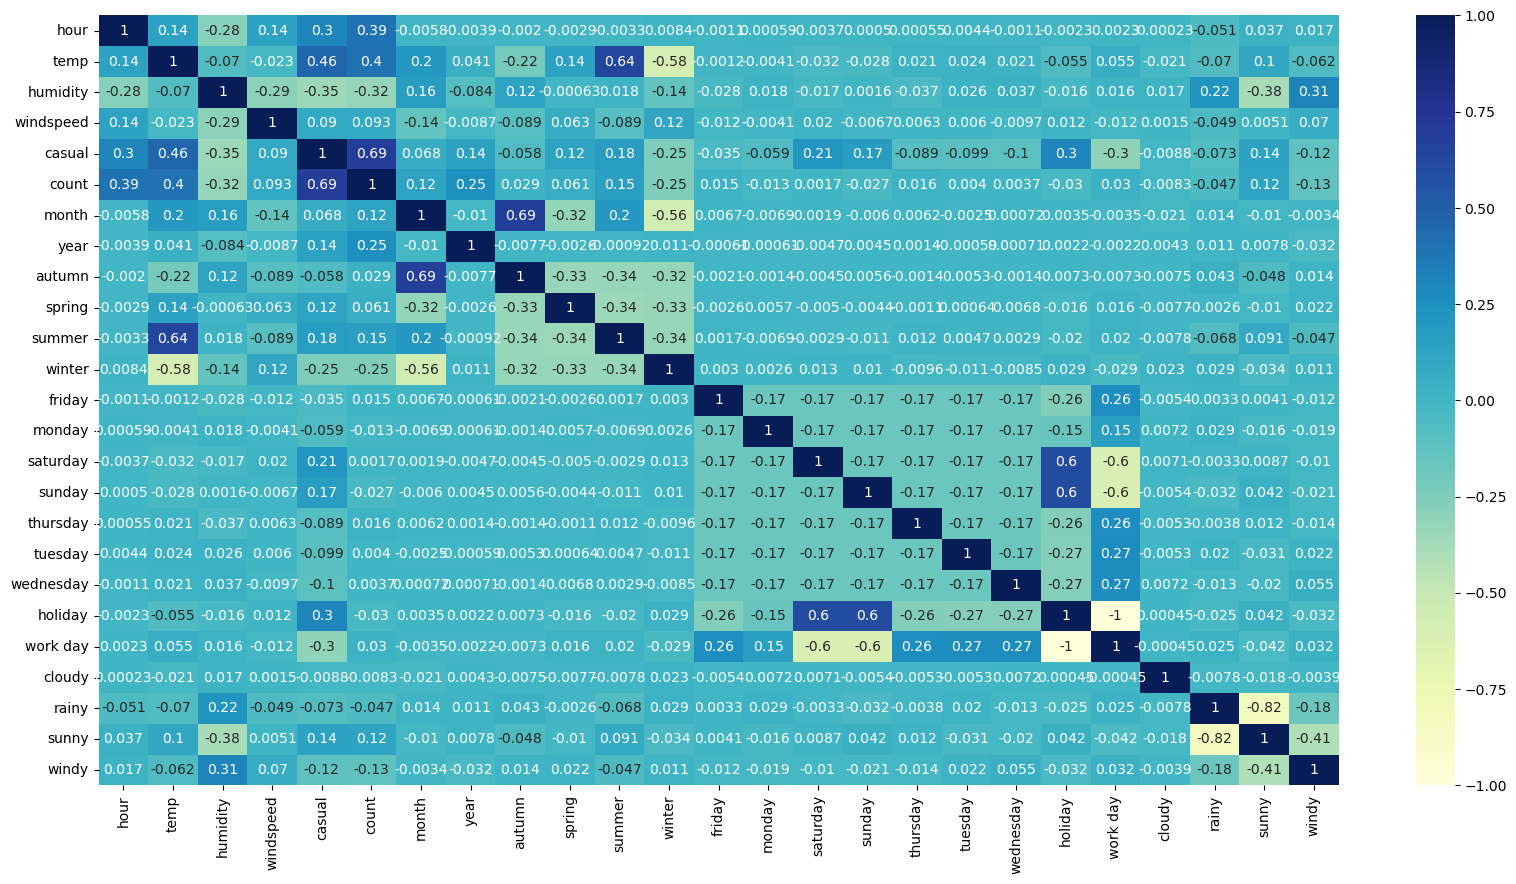

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the map above you might have noticed, casual seems to be correlated to coount the most. Let's see a pairplot for area vs price.

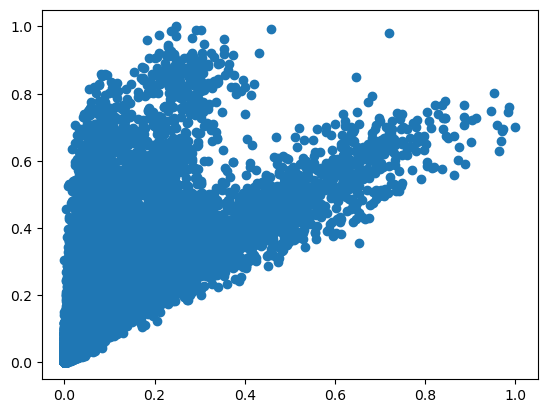

In [51]:
plt.scatter('casual','count',data=bike)

## 6.MACHINE_LEARNING_MODEL

### Define X and Y

In [52]:
X=bike.drop(['count'],axis=1).values #independent variables
y=bike['count'] #dependent variable
print (X)
print (y)

[[0.         0.2244898  0.81       ... 0.         1.         0.        ]
 [0.04347826 0.20408163 0.8        ... 0.         1.         0.        ]
 [0.08695652 0.20408163 0.8        ... 0.         1.         0.        ]
 ...
 [0.91304348 0.24489796 0.6        ... 0.         1.         0.        ]
 [0.95652174 0.24489796 0.56       ... 0.         1.         0.        ]
 [1.         0.24489796 0.65       ... 0.         1.         0.        ]]
0        0.015369
1        0.039959
2        0.031762
3        0.012295
4        0.000000
           ...   
17374    0.120902
17375    0.090164
17376    0.091189
17377    0.061475
17378    0.049180
Name: count, Length: 17379, dtype: float64


X and y was defined in order to have a  data structure, carry out regression tasks, model training, evaluate performance , establish relationship between input features and target variable for accurate predictions.

### Split the data into Train set and Test set from sklearn

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

I splitted my dataset into 70% training and 30% testing

## 6.1.Linear_Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

### Model Training

In [55]:
from sklearn.linear_model import LinearRegression
Model_LR = LinearRegression()

Model_LR.fit(X_train,y_train)

LinearRegression()

### Accuracy of the model

In [56]:
# Accuracy of the model
LR = Model_LR.score(X_train, y_train)
print('Accuracy of the model :', LR)
print('Model coefficients :', Model_LR.coef_)
print('Model intercept value :', Model_LR.intercept_)

Accuracy of the model : 0.6149022547541658
Model coefficients : [ 0.11167722  0.04342604 -0.03651165  0.02874533  0.89053671 -0.00217597
  0.05989752  0.03048038 -0.01063473  0.00311711 -0.02296276 -0.00610557
 -0.00406549 -0.00805795 -0.00913086  0.00761239  0.00889894  0.01084854
 -0.0389002   0.0389002  -0.01390257  0.01545589  0.01289643 -0.01444975]
Model intercept value : -0.006726800657862159


 evaluates the performance and parameters of a linear regression model. the outputs provide insights into the model's fit to the data and the most influential features in prediction.

### Predicting the train data

In [57]:
train = Model_LR.predict(X_train)
train

array([0.13079636, 0.25232337, 0.13704837, ..., 0.20602269, 0.07010531,
       0.25933044])

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create a linear regression model
model_lr = LinearRegression()

# Train the model using cross-validation and calculate evaluation metrics
r2_scores = cross_val_score(model_lr, X_train, y_train, cv=3, scoring='r2')
mse_scores = cross_val_score(model_lr, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(model_lr, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')

# Print the average evaluation scores
print('R-squared scores:', np.average(r2_scores))
print('Mean Squared Error (MSE):', -np.average(mse_scores))
print('Root Mean Squared Error (RMSE):', np.average(rmse_scores))
print('Mean Absolute Error (MAE):', -np.average(mae_scores))

R-squared scores: 0.6131515110852642
Mean Squared Error (MSE): 0.013586825294202005
Root Mean Squared Error (RMSE): 0.11654494040310805
Mean Absolute Error (MAE): 0.08181996181188401


### Predicting the test set

In [59]:
y_pred= Model_LR.predict(X_test)
y_pred

array([0.59268231, 0.11059698, 0.07715006, ..., 0.65820375, 0.29797657,
       0.08468206])

### Evaluating the Model

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Create a dictionary to store the evaluation metrics
LR_results = {
    'Model': 'Linear Regression',
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Error (MAE)': mae,
    'R-squared (R2) Score': r2
}

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.013115079673917342
Root Mean Squared Error (RMSE): 0.11452108833711519
Mean Absolute Error (MAE): 0.08169828334796092
R-squared (R2) Score: 0.6045337878767401


After training and testing, the reuslt shows that the R2-squared performed better than the other evaluation metrics with approximately 60%.

#### Residual Plot

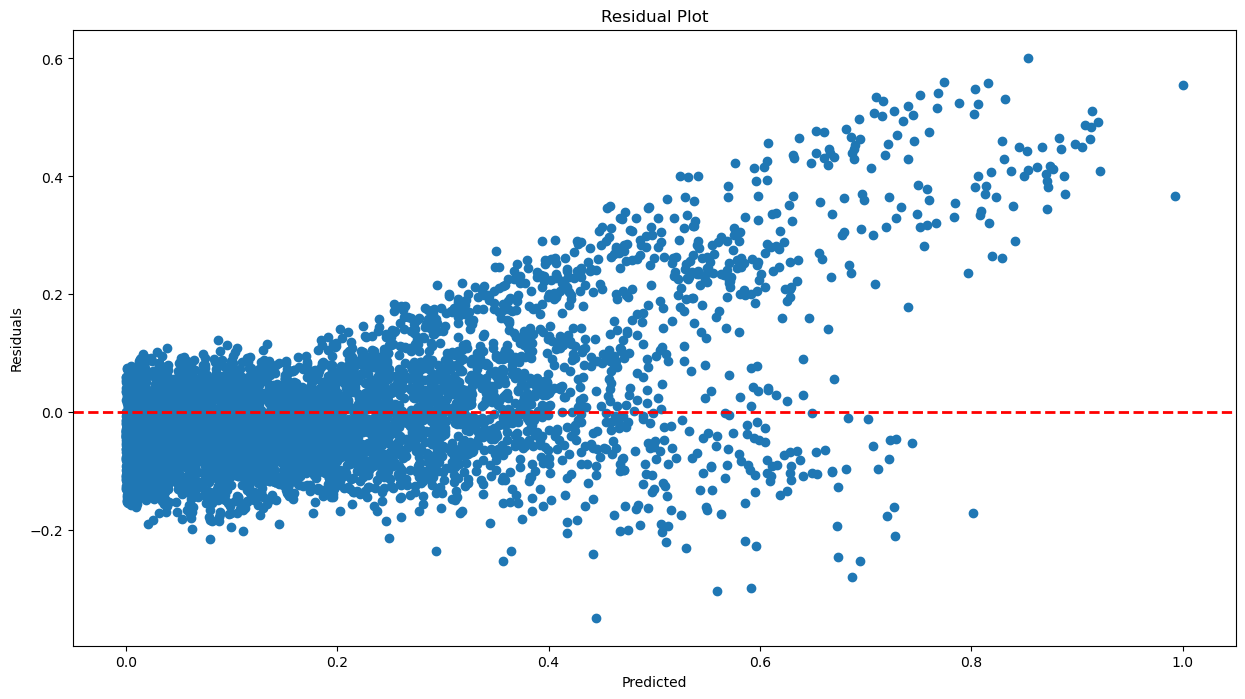

In [61]:
# Calculate residuals
y_pred_test = Model_LR.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_test

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the residuals against the observed values
ax.scatter(y_test, residuals)

# Add a horizontal line at y=0
ax.axhline(lw=2, color='red',linestyle='--')

# Set labels for x and y axes
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')

# Set the title of the plot
ax.title.set_text("Residual Plot")

# Show the plot
plt.show()

This plot indicates whether the model's assumptions between observed and predicted values are met or if there is room for improvement. It also detect non-linearity in the relationship between predictors and target variables. However, my residual plot suggests that the residuals have no systematic relationship with the predicted values, indicating that the model's assumptions are met.

In [62]:
Prediction_df= pd.DataFrame({'Actual Value' : y_test, 'Predicted value': y_pred, 'Differences' : y_test - y_pred})
Prediction_df[:20]


Actual Value  Predicted value  Differences
12830      0.434426         0.592682    -0.158256
8688       0.089139         0.110597    -0.021458
7091       0.003074         0.077150    -0.074076
12230      0.537910         0.387114     0.150796
431        0.012295         0.043197    -0.030902
1086       0.031762         0.045397    -0.013635
11605      0.722336         0.357554     0.364782
7983       0.025615         0.006581     0.019034
10391      0.001025         0.104187    -0.103163
7046       0.020492         0.107134    -0.086642
17355      0.033811         0.078054    -0.044243
11369      0.090164         0.231294    -0.141130
12659      0.554303         0.685761    -0.131457
12695      0.008197         0.111765    -0.103568
6147       0.331967         0.281435     0.050532
1838       0.343238         0.146821     0.196416
217        0.191598         0.063479     0.128119
16651      0.489754         0.374012     0.115743
15025      0.015369         0.091466    -0.076098
11940      0.871926         0.527328     0.344598

## 6.2.Random_Forest

### Training the model

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor with desired hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the Random Forest Regressor on the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

### Predicting and evaluating the train data

In [64]:

# Make predictions
y_pred = rf_regressor.predict(X_train)

# Train the model using cross-validation and calculate evaluation metrics
r2_scores = cross_val_score(rf_regressor, X_train, y_train, cv=3, scoring='r2')
mse_scores = cross_val_score(rf_regressor, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(rf_regressor, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')

# Print the average evaluation scores
print('R-squared scores:', np.average(r2_scores))
print('Mean Squared Error (MSE):', -np.average(mse_scores))
print('Root Mean Squared Error (RMSE):', np.average(rmse_scores))
print('Mean Absolute Error (MAE):', -np.average(mae_scores))

R-squared scores: 0.9605699013186045
Mean Squared Error (MSE): 0.0013837786915388934
Root Mean Squared Error (RMSE): 0.03719295197064682
Mean Absolute Error (MAE): 0.022811239581438287


### Predicting and evaluating the test

In [65]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics
mse_random_forest = mean_squared_error(y_test, y_pred)
rmse_random_forest = np.sqrt(mse_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)

# Create a dictionary to store the evaluation metrics
random_forest_results = {
    'Model': 'Random Forest Regression',
    'Mean Squared Error (MSE)': mse_random_forest,
    'Root Mean Squared Error (RMSE)': rmse_random_forest,
    'Mean Absolute Error (MAE)': mae_random_forest,
    'R-squared (R2) Score': r2_random_forest
}

# Print the evaluation metrics
print("R-squared (R2) Score:", r2_random_forest)
print("Mean Squared Error (MSE):", mse_random_forest)
print("Root Mean Squared Error (RMSE):", rmse_random_forest)
print("Mean Absolute Error (MAE):", mae_random_forest)

R-squared (R2) Score: 0.9634794589565178
Mean Squared Error (MSE): 0.001211152282639386
Root Mean Squared Error (RMSE): 0.034801613218921126
Mean Absolute Error (MAE): 0.021111863079854368


After the training and testing R2-squared did better than the other evaluation metrics with 96%. Random forest performed way better than linear regression.

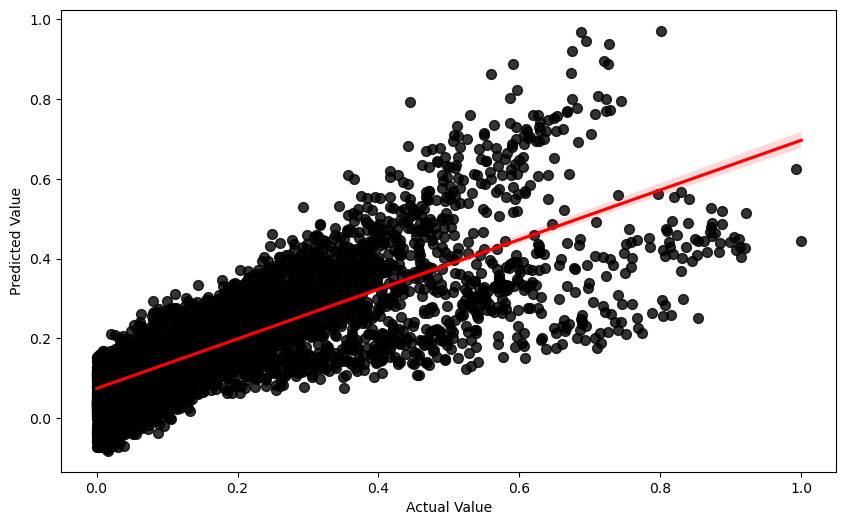

In [66]:
# Create a scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Value', y='Predicted value', data=Prediction_df, scatter_kws={'s': 50, 'color': 'black'}, line_kws={'color': 'red'})
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

All the points fell along the red line, indicating a perfect match between the actual and predicted values.
which suggests that the model's predictions are accurate and closely align with the actual values.

## 6.3.Decision Tree Regressor

### Train and fit the data

In [67]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Predicting and evaluating the train data

In [68]:

# Make predictions
y_pred = dt_regressor.predict(X_train)

# Train the model using cross-validation and calculate evaluation metrics
r2_scores = cross_val_score(dt_regressor, X_train, y_train, cv=3, scoring='r2')
mse_scores = cross_val_score(dt_regressor, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(dt_regressor, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')

# Print the average evaluation scores
print('R-squared scores:', np.average(r2_scores))
print('Mean Squared Error (MSE):', -np.average(mse_scores))
print('Root Mean Squared Error (RMSE):', np.average(rmse_scores))
print('Mean Absolute Error (MAE):', -np.average(mae_scores))

R-squared scores: 0.9282061259559602
Mean Squared Error (MSE): 0.002520781549117533
Root Mean Squared Error (RMSE): 0.05020433751667417
Mean Absolute Error (MAE): 0.031297628913909165


### Predicting and evaluating the test

In [69]:


# Make predictions on the test set
y_pred= dt_regressor.predict(X_test)

# Calculate evaluation metrics
mse_decision_tree = mean_squared_error(y_test, y_pred)
rmse_decision_tree = np.sqrt(mse_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred)
r2_decision_tree = r2_score(y_test, y_pred)

# Create a dictionary to store the evaluation metrics
decision_tree_results = {
    'Model': 'Decision Tree Regression',
    'Mean Squared Error (MSE)': mse_decision_tree,
    'Root Mean Squared Error (RMSE)': rmse_decision_tree,
    'Mean Absolute Error (MAE)': mae_decision_tree,
    'R-squared (R2) Score': r2_decision_tree
}

# Print the evaluation metrics
print("R-squared (R2) Score:", r2_decision_tree)
print("Mean Squared Error (MSE):", mse_decision_tree)
print("Root Mean Squared Error (RMSE):", rmse_decision_tree)
print("Mean Absolute Error (MAE):", mae_decision_tree)

R-squared (R2) Score: 0.9236262015728743
Mean Squared Error (MSE): 0.002532829406572057
Root Mean Squared Error (RMSE): 0.05032722331474346
Mean Absolute Error (MAE): 0.02952112691555522


After training and testing i can that the R2-squared score performed better with 92% 

### Learning Curve

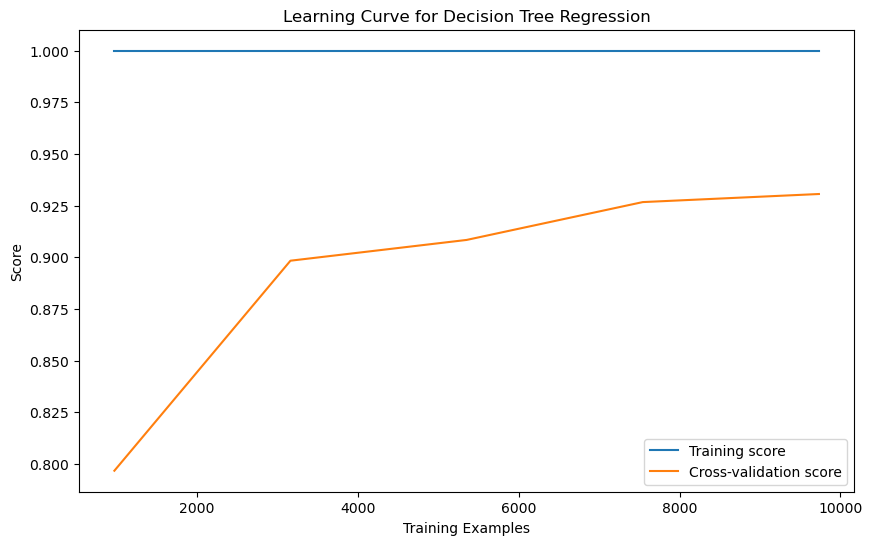

In [70]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(dt_regressor, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for Decision Tree Regression')
plt.legend(loc='best')
plt.show()

The learning curve indicates a model's learning ability and generalization to new data, with overfitting indicating a model's close fit to training data, potentially hindering its generalization.

## 6.4.KNN Regresor

### Train and fit the data

In [71]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regressor model
knn_regressor = KNeighborsRegressor()

# Train the model
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

### Predicting and evaluating the train data

In [72]:

# Make predictions
y_pred = knn_regressor.predict(X_train)

# Train the model using cross-validation and calculate evaluation metrics
r2_scores = cross_val_score(knn_regressor, X_train, y_train, cv=3, scoring='r2')
mse_scores = cross_val_score(knn_regressor, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(knn_regressor, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')

# Print the average evaluation scores
print('R-squared scores:', np.average(r2_scores))
print('Mean Squared Error (MSE):', -np.average(mse_scores))
print('Root Mean Squared Error (RMSE):', np.average(rmse_scores))
print('Mean Absolute Error (MAE):', -np.average(mae_scores))

R-squared scores: 0.6657841168732846
Mean Squared Error (MSE): 0.011737203458216347
Root Mean Squared Error (RMSE): 0.1083271763421509
Mean Absolute Error (MAE): 0.07054055237748715


### Predicting and evaluating the test

In [73]:

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a dictionary to store the evaluation metrics
knn_results = {
    'Model': 'KNN Regression',
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Error (MAE)': mae,
    'R-squared (R2) Score': r2
}


# Print the evaluation metrics
print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R-squared (R2) Score: 0.7146179884865466
Mean Squared Error (MSE): 0.00946429228025976
Root Mean Squared Error (RMSE): 0.09728459425962448
Mean Absolute Error (MAE): 0.06227319103045396


After training and testing it is seen that the r2-square has the highest score of 71%. which suggest it did not perform better as random forest and decision tree but it performed better than linear regression.

### Feature Importance

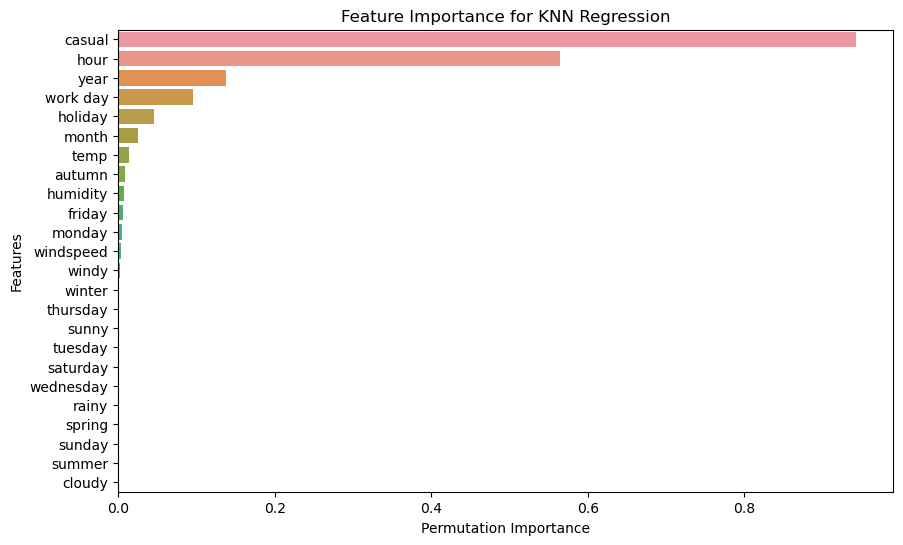

In [74]:
from sklearn.inspection import permutation_importance

# Train your regression model first, for example, let's assume you have trained a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()  # Instantiate the model
model.fit(X_train, y_train)  # Train the model on your training data

X_train_columns = ['hour','temp','humidity','windspeed','casual','month','year','autumn','spring','summer','winter','friday','monday','saturday','sunday','thursday','tuesday','wednesday','holiday','work day','cloudy','rainy','sunny','windy'] 

# Calculate permutation importance
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importance scores
feature_importance_scores = perm_importance.importances_mean

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X_train_columns, 'Importance': feature_importance_scores})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance for KNN Regression')
plt.show()

This shows the permutation importance of features from my KNN model, indicating the model performance when each feature's value is randomly permuted. My model shows that the hour, month, casual and humidity feature performed better than year, autumn, rainy features

## 6.5.SVM_Regression _Model

### Train and fit the data

In [75]:
# Create a SVM Regressor model
svm_regressor = SVR()

# Train SVM Regression model
svm_regressor.fit(X_train, y_train)

SVR()

### Predicting and evaluating the train model

In [76]:
# Make predictions on the training data
y_pred = svm_regressor.predict(X_train)

# Train the model using cross-validation and calculate evaluation metrics
r2_scores = cross_val_score(svm_regressor, X_train, y_train, cv=3, scoring='r2')
mse_scores = cross_val_score(svm_regressor, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(svm_regressor, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')

# Print the average evaluation scores
print('R-squared scores:', np.average(r2_scores))
print('Mean Squared Error (MSE):', -np.average(mse_scores))
print('Root Mean Squared Error (RMSE):', np.average(rmse_scores))
print('Mean Absolute Error (MAE):', -np.average(mae_scores))

R-squared scores: 0.6851077841989784
Mean Squared Error (MSE): 0.011058270445144605
Root Mean Squared Error (RMSE): 0.10514854415554357
Mean Absolute Error (MAE): 0.0743833097922787


### Predicting and evaluating the test model

In [77]:
# Make predictions
y_pred = svm_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a dictionary to store the evaluation metrics
svm_results = {
    'Model': 'SVM Regression',
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Error (MAE)': mae,
    'R-squared (R2) Score': r2
}

# Print the evaluation metrics
print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R-squared (R2) Score: 0.6855932937272566
Mean Squared Error (MSE): 0.010426855383275434
Root Mean Squared Error (RMSE): 0.1021119747300748
Mean Absolute Error (MAE): 0.07298720058401005


After training and testing the model has a performance of 69% for the r2-squared evaluation metrics

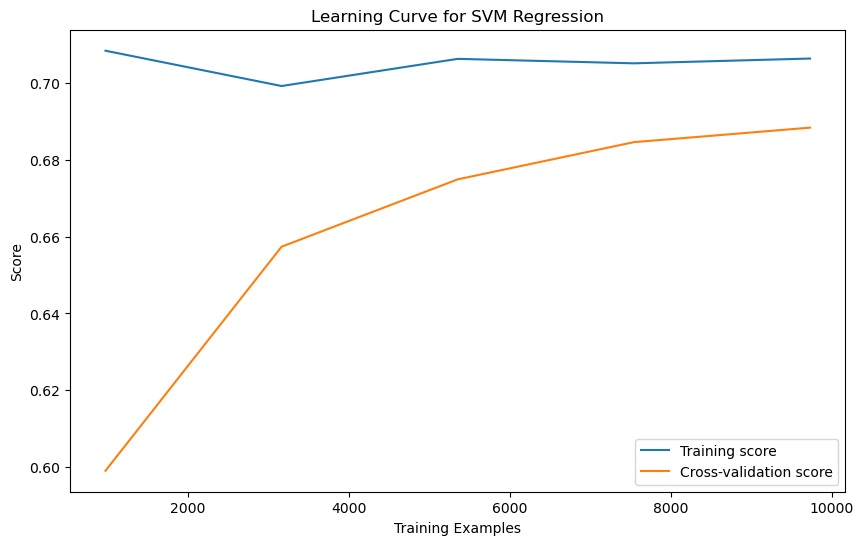

In [78]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(svm_regressor, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for SVM Regression')
plt.legend(loc='best')
plt.show()

The learning curve indicates a model's learning ability and generalization to new data, themore the training sample the more the evaluation score.

## 6.6.Lasso_Regression

  ### Train and fit the data

In [79]:
from sklearn.linear_model import Lasso

# Initialize and fit the Lasso Regression model
lasso_regressor = Lasso(alpha=0.001)  # Adjust the alpha value as needed

# Train lasso Regression model
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.001)

### Predicting and evaluating the train model

In [80]:
# Make predictions on the training data
y_pred = lasso_regressor.predict(X_train)

# Train the model using cross-validation and calculate evaluation metrics
r2_scores = cross_val_score(lasso_regressor, X_train, y_train, cv=3, scoring='r2')
mse_scores = cross_val_score(lasso_regressor, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(lasso_regressor, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')

# Print the average evaluation scores
print('R-squared scores:', np.average(r2_scores))
print('Mean Squared Error (MSE):', -np.average(mse_scores))
print('Root Mean Squared Error (RMSE):', np.average(rmse_scores))
print('Mean Absolute Error (MAE):', -np.average(mae_scores))

R-squared scores: 0.6094760271660015
Mean Squared Error (MSE): 0.013716233743691459
Root Mean Squared Error (RMSE): 0.1170971966461551
Mean Absolute Error (MAE): 0.08133913312792772


### Predicting and evaluating the test model

In [81]:
# Make predictions on the test set
y_pred = lasso_regressor.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Create a dictionary to store the evaluation metrics
lasso_results = {
    'Model': 'Lasso Regression',
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Error (MAE)': mae,
    'R-squared (R2) Score': r2
}

# Print the evaluation metrics
print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared (R2) Score: 0.6031239093846636
Mean Squared Error (MSE): 0.0131618363074483
Root Mean Squared Error (RMSE): 0.11472504655674932
Mean Absolute Error (MAE): 0.08093835436412024


#### Residual Plot

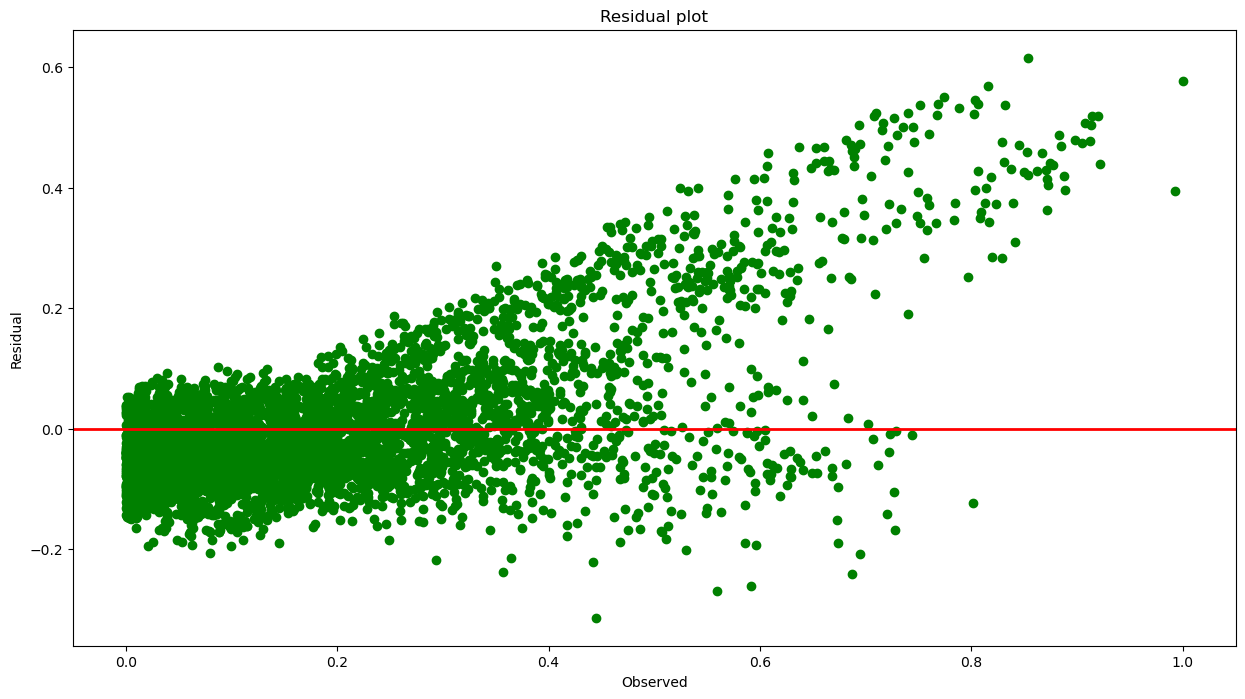

In [82]:
#Residual scatter plot
residuals = y_test-lasso_regressor.predict(X_test)
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals,color='green')
ax.axhline(lw=2,color='red')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

my residual plot suggests that the residuals have no systematic relationship with the predicted values, indicating that the model's assumptions are met.

## 6.7.Ridge_Regression

  ### Train and fit the data

In [83]:
from sklearn.linear_model import Ridge

# Initialize and fit the Ridge Regression model
ridge_regressor = Ridge(alpha=0.1)  # Adjust the alpha value as needed

# Train ridge Regression model
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.1)

### Predicting and evaluating the train model

In [84]:
# Make predictions on the training data
y_pred = ridge_regressor.predict(X_train)

# Train the model using cross-validation and calculate evaluation metrics
r2_scores = cross_val_score(ridge_regressor, X_train, y_train, cv=3, scoring='r2')
mse_scores = cross_val_score(ridge_regressor, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(ridge_regressor, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')

# Print the average evaluation scores
print('R-squared scores:', np.average(r2_scores))
print('Mean Squared Error (MSE):', -np.average(mse_scores))
print('Root Mean Squared Error (RMSE):', np.average(rmse_scores))
print('Mean Absolute Error (MAE):', -np.average(mae_scores))

R-squared scores: 0.613153343843906
Mean Squared Error (MSE): 0.013586755396811716
Root Mean Squared Error (RMSE): 0.11654466979188151
Mean Absolute Error (MAE): 0.08181639200978541


### Predicting and evaluating the test model

In [85]:
# Make predictions on the test set
y_pred = ridge_regressor.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Create a dictionary to store the evaluation metrics
ridge_results = {
    'Model': 'Ridge Regression',
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Error (MAE)': mae,
    'R-squared (R2) Score': r2
}

# Print the evaluation metrics
print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared (R2) Score: 0.6045478185915424
Mean Squared Error (MSE): 0.013114614365031594
Root Mean Squared Error (RMSE): 0.11451905677672862
Mean Absolute Error (MAE): 0.08169412346008822


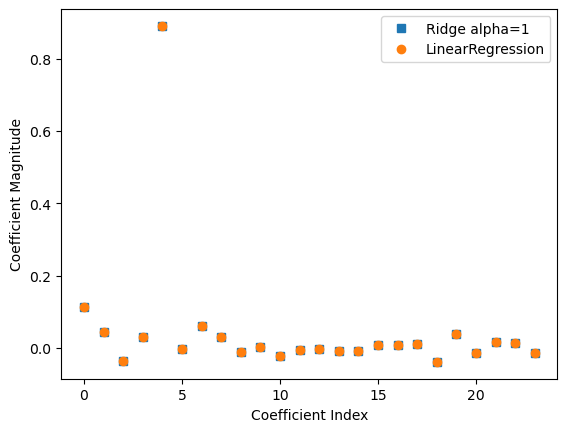

In [86]:
# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

plt.plot(ridge_regressor.coef_, 's', label="Ridge alpha=1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.legend()
plt.show()

the plot suggests that Ridge Regression's regularization effect is minimal or negligible. This is because the magnitudes of both models are similar, the regularization parameter is minimal, and the models are susceptible to overfitting. This can also be because the result is similar to linear regression result.

### Evaluation Results for Different Regression Models

In [87]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have stored evaluation results for each model in variables
# lr_results, dt_results, rf_results, knn_results, svm_results

# Create a DataFrame to store the evaluation results
evaluation_results = pd.DataFrame(columns=['Model', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 
                                           'Mean Absolute Error (MAE)', 'R-squared (R2) Score'])

# Append results for each model to the DataFrame
evaluation_results = evaluation_results.append(LR_results, ignore_index=True)
evaluation_results = evaluation_results.append(decision_tree_results, ignore_index=True)
evaluation_results = evaluation_results.append(random_forest_results,  ignore_index=True)
evaluation_results = evaluation_results.append(knn_results, ignore_index=True)
evaluation_results = evaluation_results.append(svm_results, ignore_index=True)
evaluation_results = evaluation_results.append(lasso_results, ignore_index=True)
evaluation_results = evaluation_results.append(ridge_results, ignore_index=True)

# Print the evaluation results DataFrame
print("Evaluation Results for Different Regression Models:")
display(evaluation_results)

Evaluation Results for Different Regression Models:


Model  Mean Squared Error (MSE)  \
0         Linear Regression                  0.013115   
1  Decision Tree Regression                  0.002533   
2  Random Forest Regression                  0.001211   
3            KNN Regression                  0.009464   
4            SVM Regression                  0.010427   
5          Lasso Regression                  0.013162   
6          Ridge Regression                  0.013115   

   Root Mean Squared Error (RMSE)  Mean Absolute Error (MAE)  \
0                        0.114521                   0.081698   
1                        0.050327                   0.029521   
2                        0.034802                   0.021112   
3                        0.097285                   0.062273   
4                        0.102112                   0.072987   
5                        0.114725                   0.080938   
6                        0.114519                   0.081694   

   R-squared (R2) Score  
0              0.604534  
1              0.923626  
2              0.963479  
3              0.714618  
4              0.685593  
5              0.603124  
6              0.604548

This shows the performance of all the models with Ranform forest having the highest performance, followed by decision tree,KNN regression,SVM, while linear, lasso, ridge regression has the results

## 6.8.Neural_Network

In [88]:
pip install tensorflow

     ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
     ---------------------------------------- 0.3/376.9 MB 7.9 MB/s eta 0:00:48
     --------------------------------------- 0.8/376.9 MB 10.1 MB/s eta 0:00:38
     --------------------------------------- 1.5/376.9 MB 12.3 MB/s eta 0:00:31
     --------------------------------------- 2.5/376.9 MB 16.1 MB/s eta 0:00:24
     --------------------------------------- 3.8/376.9 MB 18.8 MB/s eta 0:00:20
      -------------------------------------- 5.6/376.9 MB 22.4 MB/s eta 0:00:17
      -------------------------------------- 7.6/376.9 MB 25.5 MB/s eta 0:00:15
      -------------------------------------- 9.6/376.9 MB 28.0 MB/s eta 0:00:14
     - ------------------------------------ 11.3/376.9 MB 34.6 MB/s eta 0:00:11
     - ------------------------------------ 13.1/376.9 MB 38.6 MB/s eta 0:00:10
     - ------------------------------------ 15.1/376.9 MB 40.9 MB/s eta 0:00:09
     - ------------------------------------ 17.


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Epoch 1/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0294 - mae: 0.1248 - mse: 0.0294 - val_loss: 0.0164 - val_mae: 0.0989 - val_mse: 0.0164
Epoch 2/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0143 - mae: 0.0840 - mse: 0.0143 - val_loss: 0.0164 - val_mae: 0.1063 - val_mse: 0.0164
Epoch 3/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0134 - mae: 0.0823 - mse: 0.0134 - val_loss: 0.0120 - val_mae: 0.0782 - val_mse: 0.0120
Epoch 4/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0124 - mae: 0.0774 - mse: 0.0124 - val_loss: 0.0114 - val_mae: 0.0731 - val_mse: 0.0114
Epoch 5/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0117 - mae: 0.0745 - mse: 0.0117 - val_loss: 0.0110 - val_mae: 0.0703 - val_mse: 0.0110
Epoch 6/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109 - mae: 0.0716 - mse: 0.0109 - val_loss: 0.0106 - val_mae: 0.0685 - val_mse: 0.0106
Epoch 7/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0113 - mae: 0.0736 - mse: 0.011

305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - mae: 0.0247 - mse: 0.0012 - val_loss: 0.0016 - val_mae: 0.0268 - val_mse: 0.0016
Epoch 90/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - mae: 0.0245 - mse: 0.0012 - val_loss: 0.0016 - val_mae: 0.0261 - val_mse: 0.0016
Epoch 91/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - mae: 0.0258 - mse: 0.0014 - val_loss: 0.0016 - val_mae: 0.0278 - val_mse: 0.0016
Epoch 92/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - mae: 0.0268 - mse: 0.0014 - val_loss: 0.0018 - val_mae: 0.0292 - val_mse: 0.0018
Epoch 93/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - mae: 0.0252 - mse: 0.0012 - val_loss: 0.0014 - val_mae: 0.0254 - val_mse: 0.0014
Epoch 94/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - mae: 0.0233 - mse: 0.0011 - val_loss: 0.0018 - val_mae: 0.0290 - val_mse: 0.0018
Epoch 95/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - mae: 0.0271 - mse: 0.0014 - va

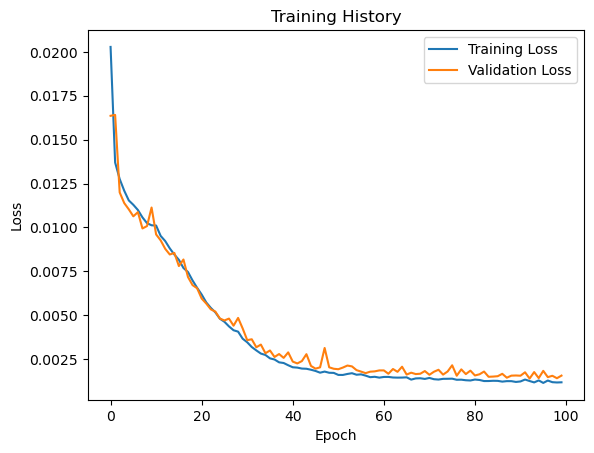

In [90]:
# Plot training history (loss)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

## 7.Hyperparameter_Tuning

Training and evaluating Linear Regression...
Training and evaluating Lasso Regression...
Training and evaluating Ridge Regression...
Training and evaluating Random Forest Regressor...
Training and evaluating Decision Tree Regressor...
Training and evaluating SVR...
Training and evaluating KNeighbors Regressor...
Evaluation Results for Different Regression Models:
                              MSE      RMSE       MAE  R2 Score  \
Linear Regression        0.013115  0.114521  0.081698  0.604534   
Lasso Regression           0.0332   0.18221  0.144389 -0.001107   
Ridge Regression         0.013115  0.114519  0.081694  0.604548   
Random Forest Regressor  0.001199  0.034622  0.021022  0.963855   
Decision Tree Regressor  0.002557  0.050564  0.029363  0.922907   
SVR                      0.009874   0.09937   0.07189  0.702253   
KNeighbors Regressor      0.00871  0.093329  0.057201  0.737355   

                                                   Best Parameters  
Linear Regression           

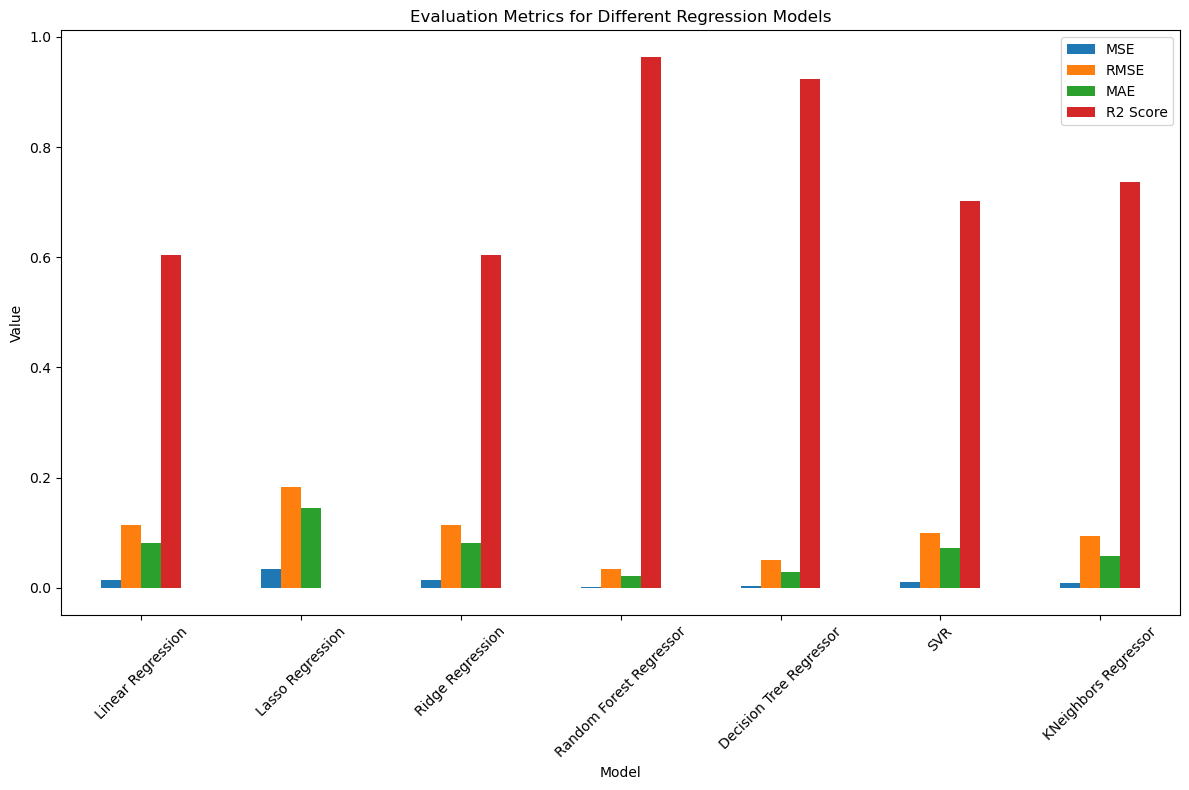

In [91]:
from sklearn.linear_model import Lasso, Ridge

# Define the models and their corresponding parameter grids for hyperparameter tuning
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Lasso Regression': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Random Forest Regressor': (RandomForestRegressor(), {'n_estimators': [300, 400], 'max_depth': [None, 10]}),
    'Decision Tree Regressor': (DecisionTreeRegressor(), {'max_depth': [None, 5]}),
    'SVR': (SVR(), {'C': [1, 10], 'gamma': [0.1, 'scale']}),
    'KNeighbors Regressor': (KNeighborsRegressor(), {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']})
}

# Perform hyperparameter tuning and evaluation for each model
results = {}
for model_name, (model, param_grid) in models.items():
    print(f"Training and evaluating {model_name}...")
    
    # Hyperparameter tuning
    clf = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2,
        'Best Parameters': clf.best_params_
    }

# Display results in tabular format
results_df = pd.DataFrame(results).T
print("Evaluation Results for Different Regression Models:")
print(results_df)

# Plot results
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', ax=plt.gca())
plt.title('Evaluation Metrics for Different Regression Models')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


After running the hyper parameter tunning for all my model, I noticed that all my model result improved most especially the R2 square evalution metrics.

## 8.Making_Predictions

### Exporting the Model

In [92]:
# Specify the path and filename for the CSV file
csv_filename = 'exported_bike.csv'

# Export the DataFrame to a CSV file
bike.to_csv(csv_filename, index=False)

# Print a message to confirm that the data has been exported
print(f"Data has been successfully exported to '{csv_filename}'.")

Data has been successfully exported to 'exported_bike.csv'.


## Saving my model

In [93]:
from joblib import dump

# Assuming your trained model is named 'model'
# Save the model to a file
dump(bike, 'model.joblib')

['model.joblib']

### Loading a new data 

In [94]:
# Load the new data
new_data = pd.read_csv(r"C:\Users\q2241217\Downloads\new_bike_data.csv") 

### Making predictions with my new data

In [96]:
# Make predictions on the new data
predictions = rf_regressor.predict(new_data)

# Print the predictions
print(predictions)

[0.02103996 0.02274078 0.01243852 0.03375512 0.01889344]


### convert the predicted values to the actual count using the inverse scaling method

In [97]:
# Define the min_count and max_count of the original target variable
min_count = 1.000000  
max_count = 977.000000  


predicted_values = np.array([0.01209016, 0.1227459, 0.14446721, 0.02909836, 0.00553279])

# Inverse scaling to convert predicted values to actual count
actual_count = predicted_values * (max_count - min_count) + min_count

# Print the actual count
print("Actual count:", actual_count)

Actual count: [ 12.79999616 120.7999984  141.99999696  29.39999936   6.40000304]


I went ahead to save my model and try to make predictions for the count of bike that was shared for the day. 